In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')
sys.path.insert(0, './../scripts')

In [2]:
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import analyze_func as af
import burst_func as bf
import plot_func as pf

# Plot RFs for Given Seed and Iteration Number

In [162]:
ngrid = 20

xs,ys = np.meshgrid(np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid),np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid))
xs,ys = xs.flatten(),ys.flatten()

in_rf = np.sqrt((xs-0.5)**2 + (ys-0.5)**2) < 0.5/np.sqrt(2)
xs,ys = xs[in_rf],ys[in_rf]
n_in_rf = len(xs)

x_idxs = np.round((xs - np.min(xs))*ngrid).astype(int)
y_idxs = np.round((ys - np.min(ys))*ngrid).astype(int)

nrf = np.max(x_idxs)+1

In [163]:
reload(pf)

def plot_rfs(seed,n_iter):        
        
    fig,axs = plt.subplots(5, 4, figsize=(16,15), dpi=150)
    
    axs = axs.flatten()
    e_axs = axs[:16]
    i_axs = axs[16:]
    if n_iter >= 0:
        with open('./../results/sim_lgn_wave_rfs_ne=16_ni=4/' +\
            'seed={:d}_iter={:d}.pkl'.format(seed,n_iter), 'rb') as handle:
            res_dict = pickle.load(handle)
        
        wen = res_dict['wex'][:,:n_in_rf]
        wef = res_dict['wex'][:,n_in_rf:]
        win = res_dict['wix'][:,:n_in_rf]
        wif = res_dict['wix'][:,n_in_rf:]
    else:
        rng = np.random.default_rng(seed)
        wex = rng.uniform(0.4,0.6,size=(16,2*n_in_rf))
        wix = rng.uniform(0.4,0.6,size=(4,2*n_in_rf))
        
        wex *= 1.0 / np.sum(wex,axis=1,keepdims=True)
        wix *= 1.0 / np.sum(wix,axis=1,keepdims=True)
        
        wen = wex[:,:n_in_rf]
        wef = wex[:,n_in_rf:]
        win = wix[:,:n_in_rf]
        wif = wix[:,n_in_rf:]
        
    max_we = np.max(np.concatenate([wen.flatten(),wef.flatten()]))#2*np.mean(np.concatenate([wen.flatten(),wef.flatten()]))
    max_wi = np.max(np.concatenate([win.flatten(),wif.flatten()]))#2*np.mean(np.concatenate([win.flatten(),wif.flatten()]))
    
    for i in range(16):
        this_wn = np.zeros((nrf,nrf))
        this_wf = np.zeros((nrf,nrf))
        this_wn[x_idxs,y_idxs] = wen[i]
        this_wf[x_idxs,y_idxs] = wef[i]
        # pf.contourbar(fig,e_axs[i],this_wn-this_wf,cmap='RdBu',
        # levels=np.linspace(-max_we,max_we,13),linewidths=0.8,origin='lower')
        pf.doubimshbar(fig,e_axs[i],this_wn,-this_wf,cmap_name='RdBu',
            vmin=-max_we,vmax=max_we,origin='lower')
        pf.doubcont(fig,e_axs[i],this_wn,-this_wf,cmap='RdBu',
            levels=np.linspace(-max_we,max_we,7),linewidths=0.8,origin='lower')
        # levels=np.linspace(-max_we,max_we,13),linewidths=0.8,origin='lower')
        
    for i in range(4):
        this_wn = np.zeros((nrf,nrf))
        this_wf = np.zeros((nrf,nrf))
        this_wn[x_idxs,y_idxs] = win[i]
        this_wf[x_idxs,y_idxs] = wif[i]
        pf.doubimshbar(fig,i_axs[i],this_wn,-this_wf,cmap_name='RdBu',
            vmin=-max_wi,vmax=max_wi,origin='lower')
        pf.doubcont(fig,i_axs[i],this_wn,-this_wf,cmap='RdBu',
            levels=np.linspace(-max_wi,max_wi,7),linewidths=0.8,origin='lower')
        # levels=np.linspace(-max_wi,max_wi,13),linewidths=0.8,origin='lower')

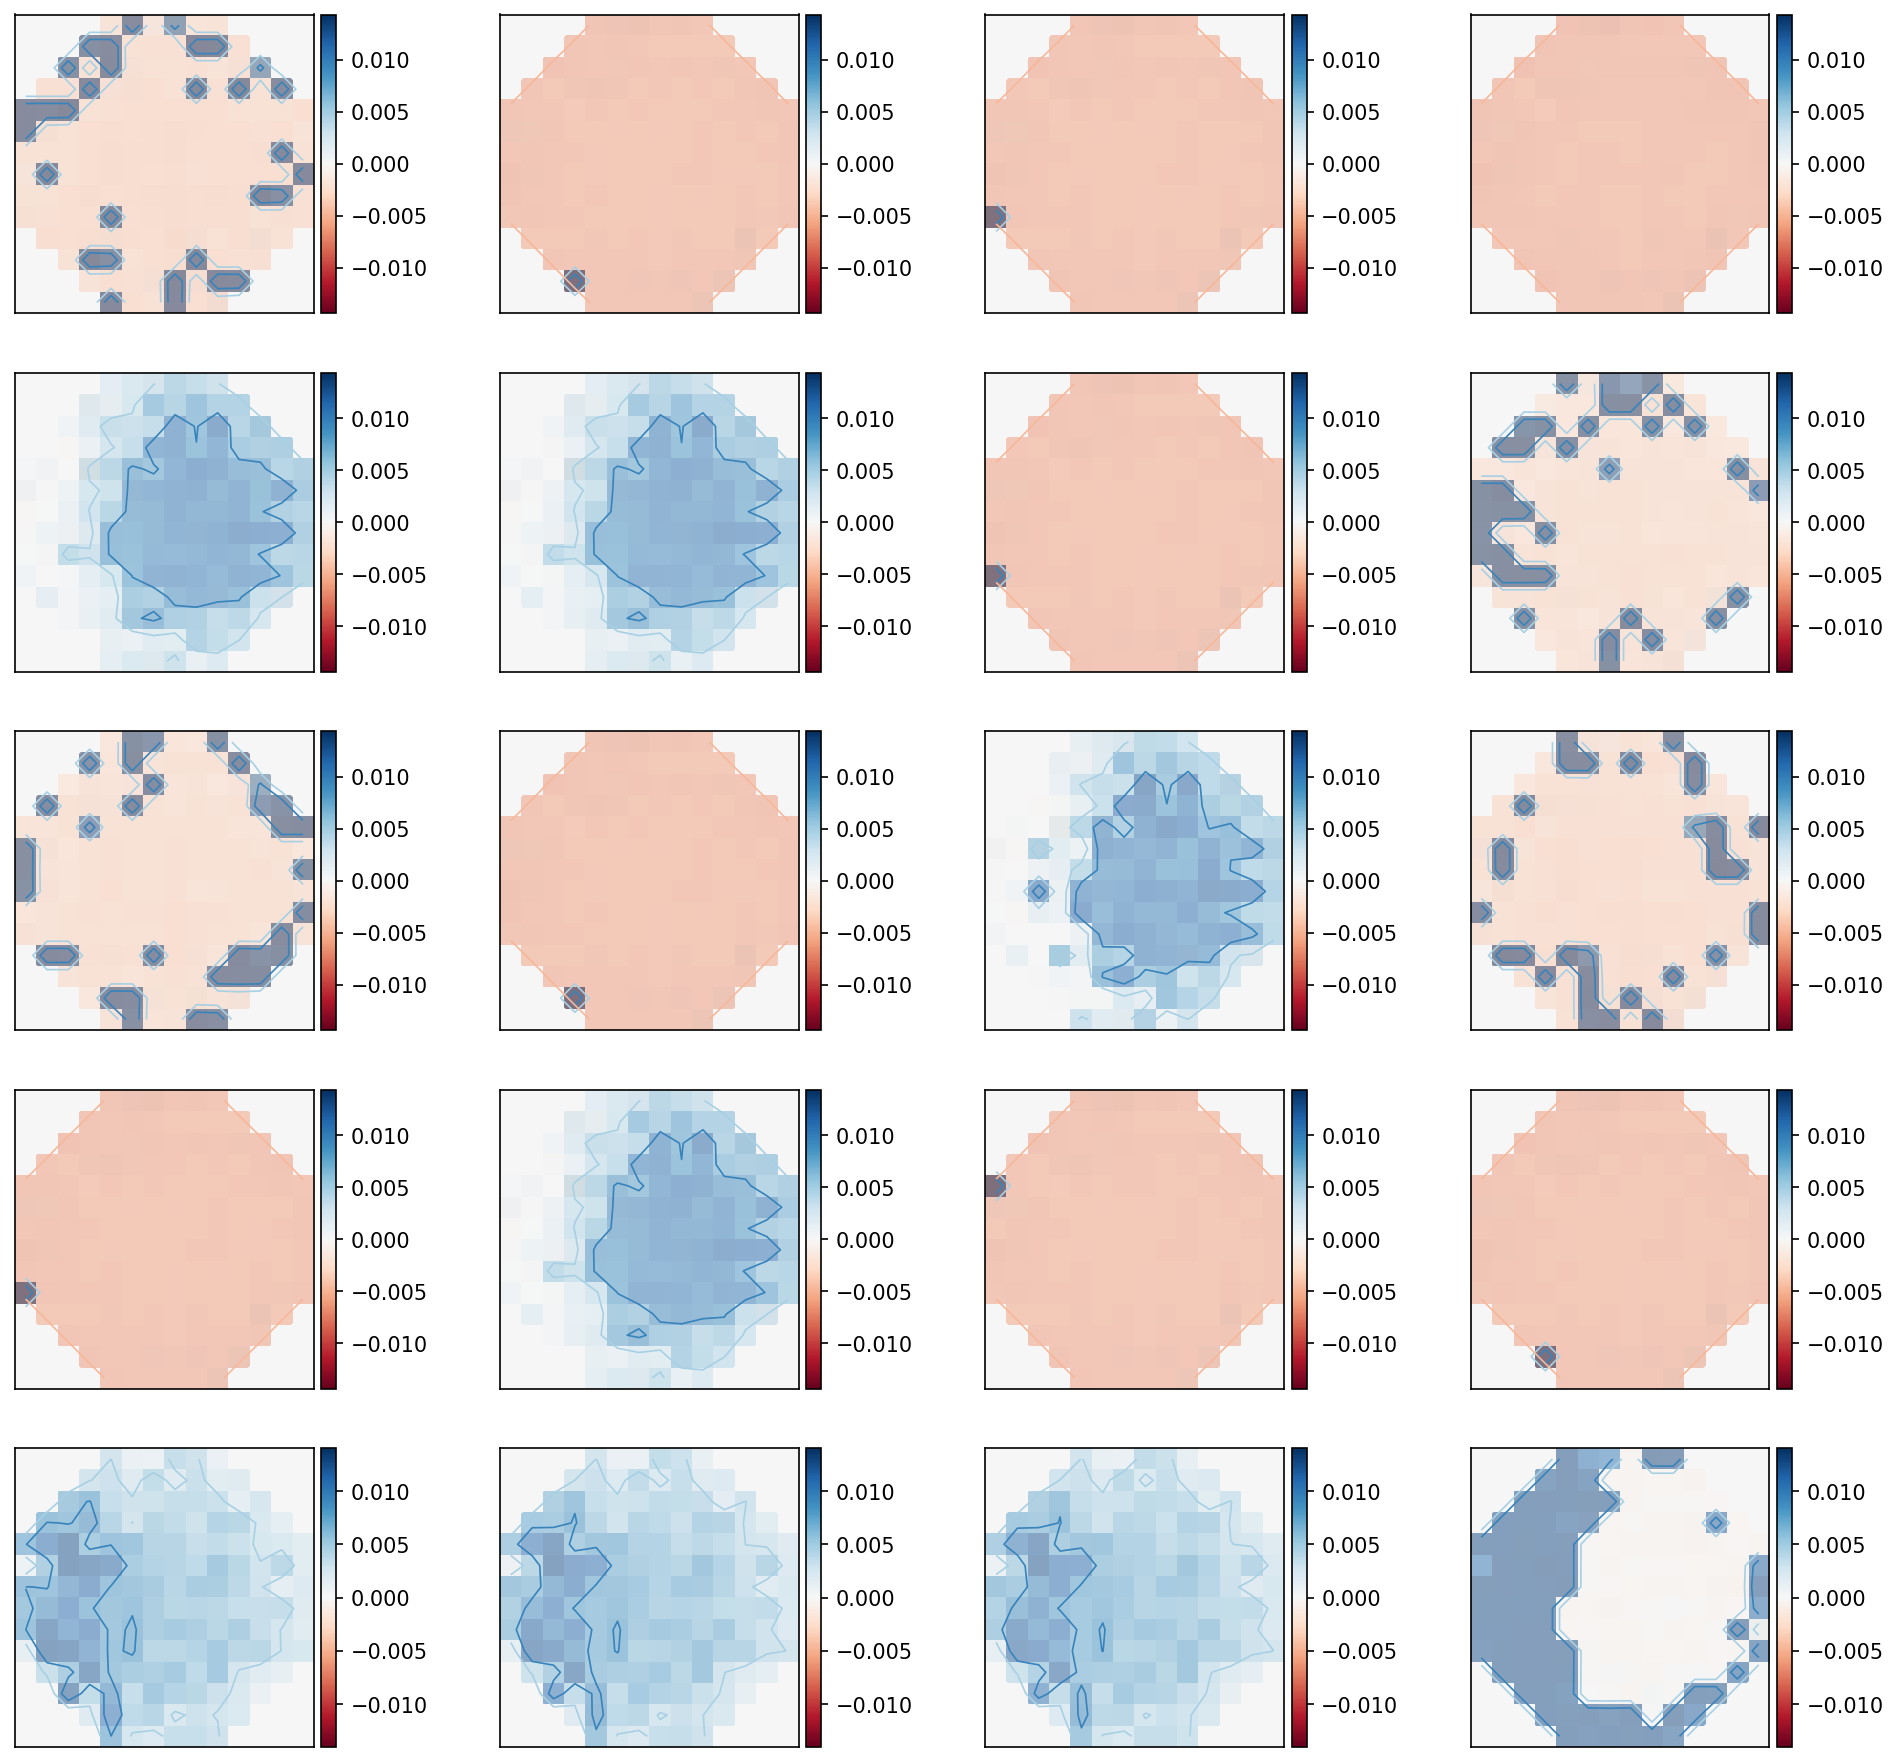

In [217]:
plot_rfs(0,49)

# Look at Results with Varied Inh Gains and WII Constraint

In [174]:
reload(pf)

def plot_cluster_rfs(seed,n_iter,gain_e,gain_i,wii_sum,hebb_wii):        
        
    fig,axs = plt.subplots(5, 4, figsize=(16,15), dpi=150)
    
    axs = axs.flatten()
    e_axs = axs[:16]
    i_axs = axs[16:]
    if n_iter >= 0:
        with open('./../results/sim_lgn_wave_rfs_ne=16_ni=4_ge={:.1f}_gi={:.1f}_wii={:.2f}_hii{:d}/'.format(
            gain_e,gain_i,wii_sum,hebb_wii) +\
            'seed={:d}_iter={:d}.pkl'.format(seed,n_iter), 'rb') as handle:
            res_dict = pickle.load(handle)
        
        wen = res_dict['wex'][:,:n_in_rf]
        wef = res_dict['wex'][:,n_in_rf:]
        win = res_dict['wix'][:,:n_in_rf]
        wif = res_dict['wix'][:,n_in_rf:]
    else:
        rng = np.random.default_rng(seed)
        wex = rng.uniform(0.4,0.6,size=(16,2*n_in_rf))
        wix = rng.uniform(0.4,0.6,size=(4,2*n_in_rf))
        
        wex *= 1.0 / np.sum(wex,axis=1,keepdims=True)
        wix *= 1.0 / np.sum(wix,axis=1,keepdims=True)
        
        wen = wex[:,:n_in_rf]
        wef = wex[:,n_in_rf:]
        win = wix[:,:n_in_rf]
        wif = wix[:,n_in_rf:]
        
    max_we = np.max(np.concatenate([wen.flatten(),wef.flatten()]))#2*np.mean(np.concatenate([wen.flatten(),wef.flatten()]))
    max_wi = np.max(np.concatenate([win.flatten(),wif.flatten()]))#2*np.mean(np.concatenate([win.flatten(),wif.flatten()]))
    
    for i in range(16):
        this_wn = np.zeros((nrf,nrf))
        this_wf = np.zeros((nrf,nrf))
        this_wn[x_idxs,y_idxs] = wen[i]
        this_wf[x_idxs,y_idxs] = wef[i]
        # pf.contourbar(fig,e_axs[i],this_wn-this_wf,cmap='RdBu',
        # levels=np.linspace(-max_we,max_we,13),linewidths=0.8,origin='lower')
        pf.doubimshbar(fig,e_axs[i],this_wn,-this_wf,cmap_name='RdBu',
            vmin=-max_we,vmax=max_we,origin='lower')
        pf.doubcont(fig,e_axs[i],this_wn,-this_wf,cmap='RdBu',
            levels=np.linspace(-max_we,max_we,7),linewidths=0.8,origin='lower')
        # levels=np.linspace(-max_we,max_we,13),linewidths=0.8,origin='lower')
        
    for i in range(4):
        this_wn = np.zeros((nrf,nrf))
        this_wf = np.zeros((nrf,nrf))
        this_wn[x_idxs,y_idxs] = win[i]
        this_wf[x_idxs,y_idxs] = wif[i]
        pf.doubimshbar(fig,i_axs[i],this_wn,-this_wf,cmap_name='RdBu',
            vmin=-max_wi,vmax=max_wi,origin='lower')
        pf.doubcont(fig,i_axs[i],this_wn,-this_wf,cmap='RdBu',
            levels=np.linspace(-max_wi,max_wi,7),linewidths=0.8,origin='lower')
        # levels=np.linspace(-max_wi,max_wi,13),linewidths=0.8,origin='lower')

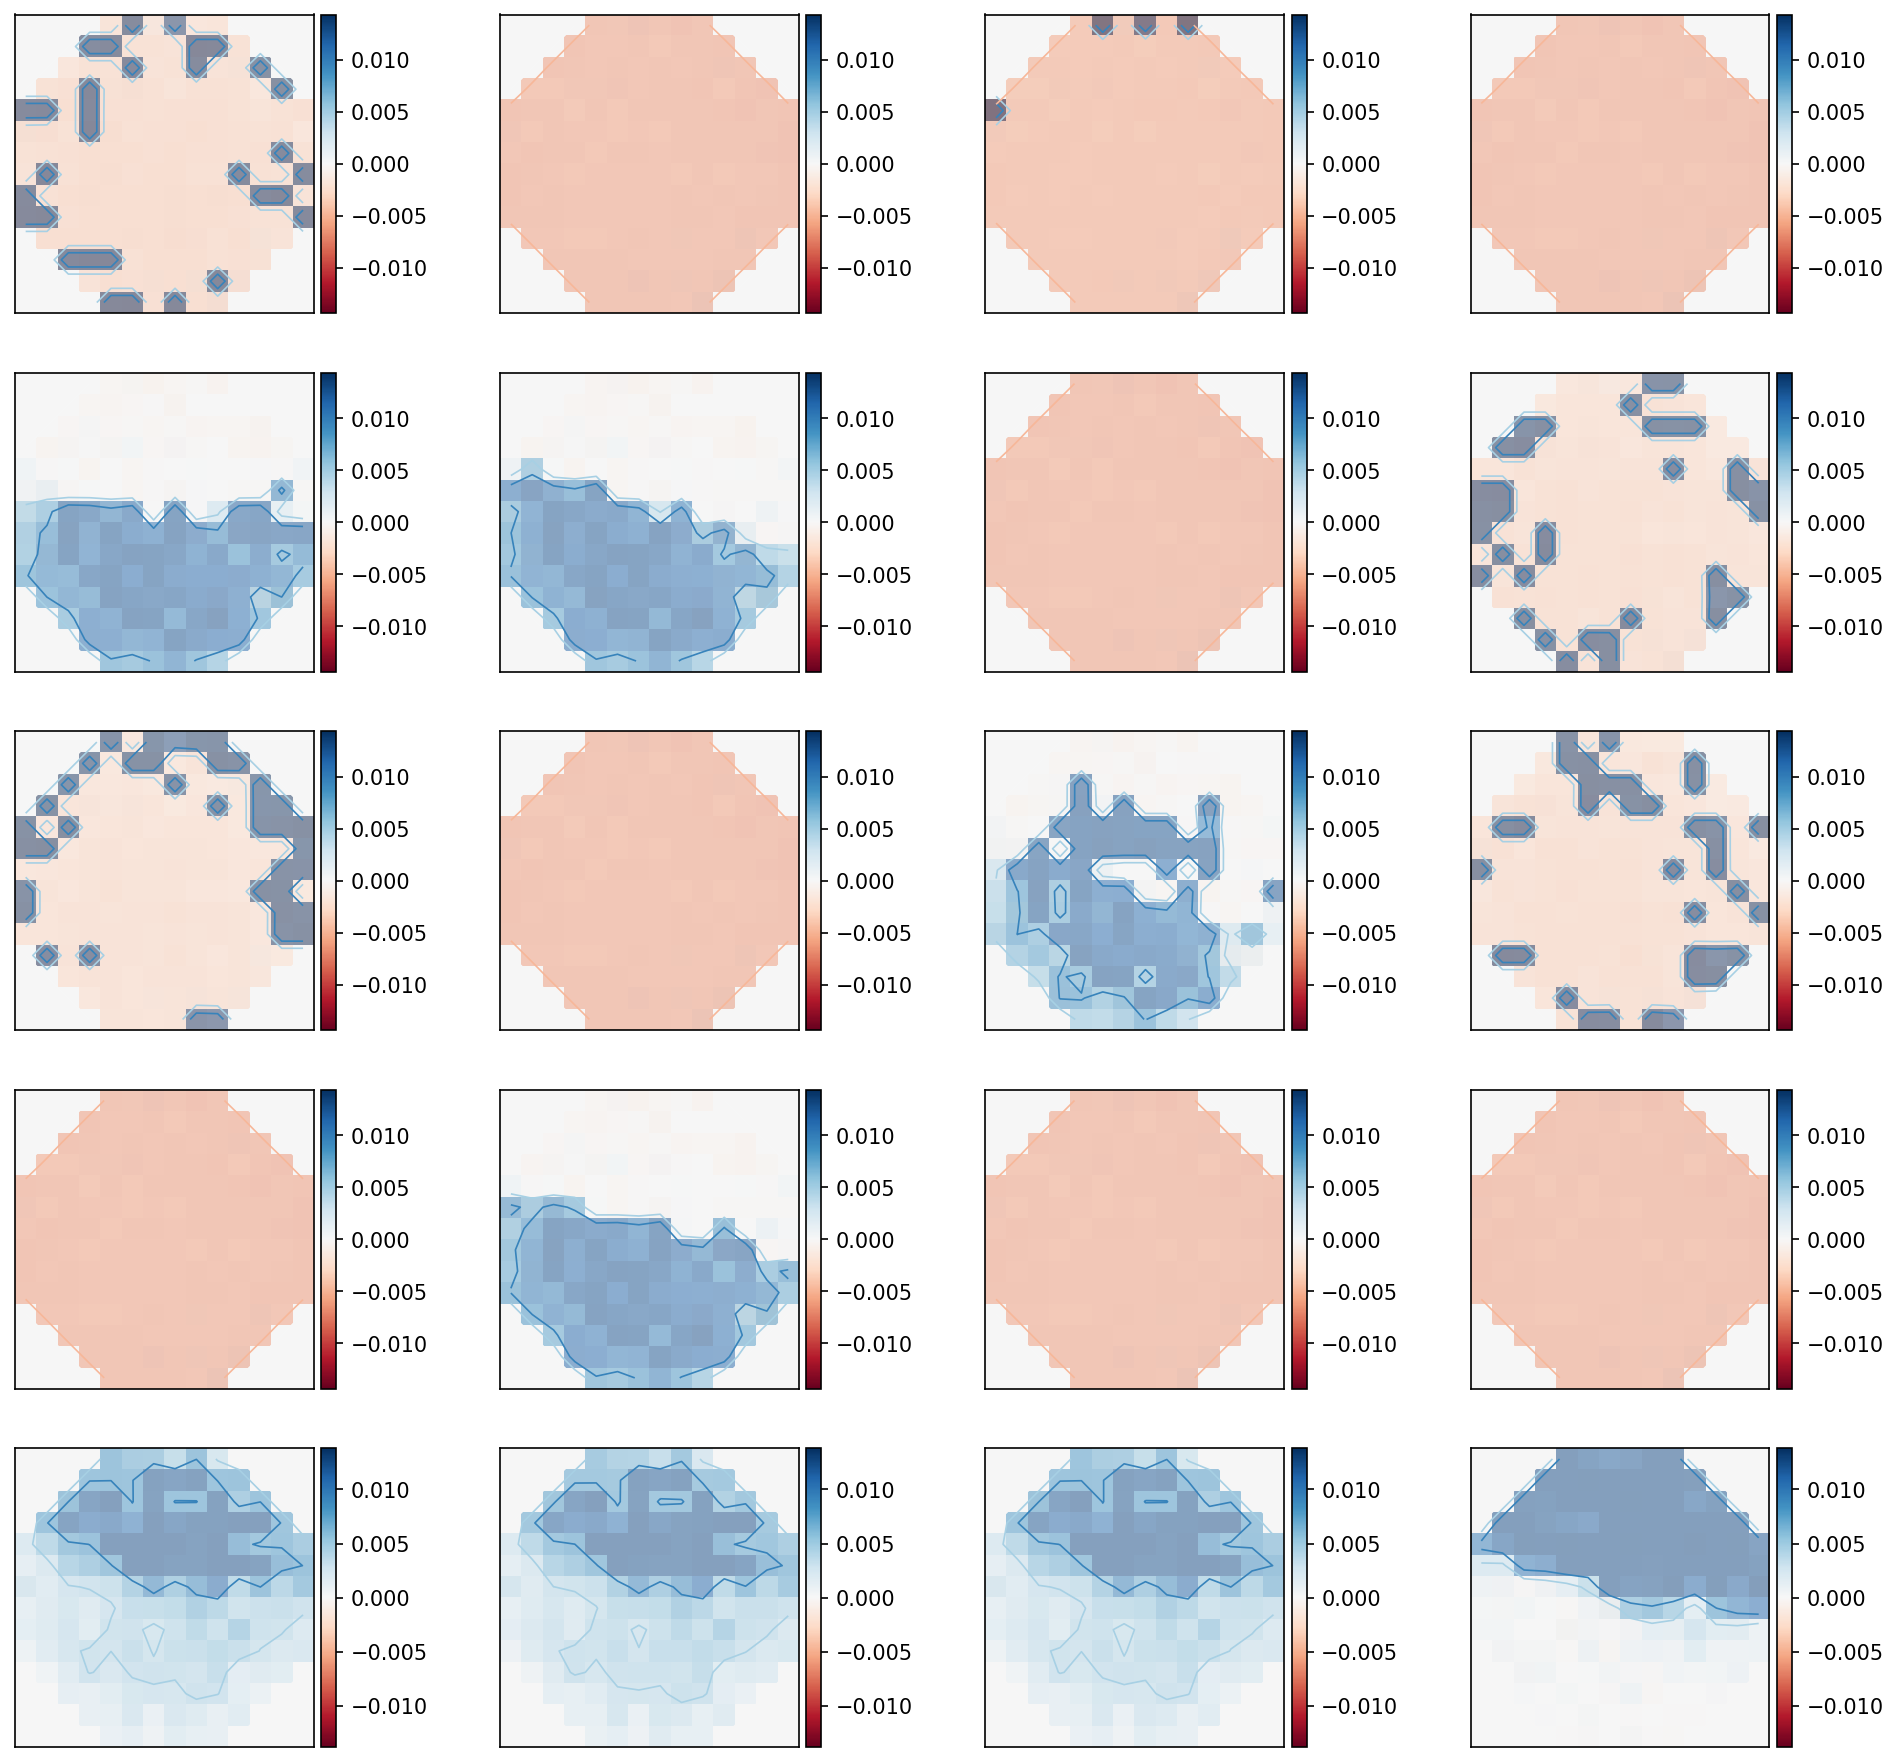

In [176]:
plot_cluster_rfs(0,99,1.0,2.0,0.25,0)

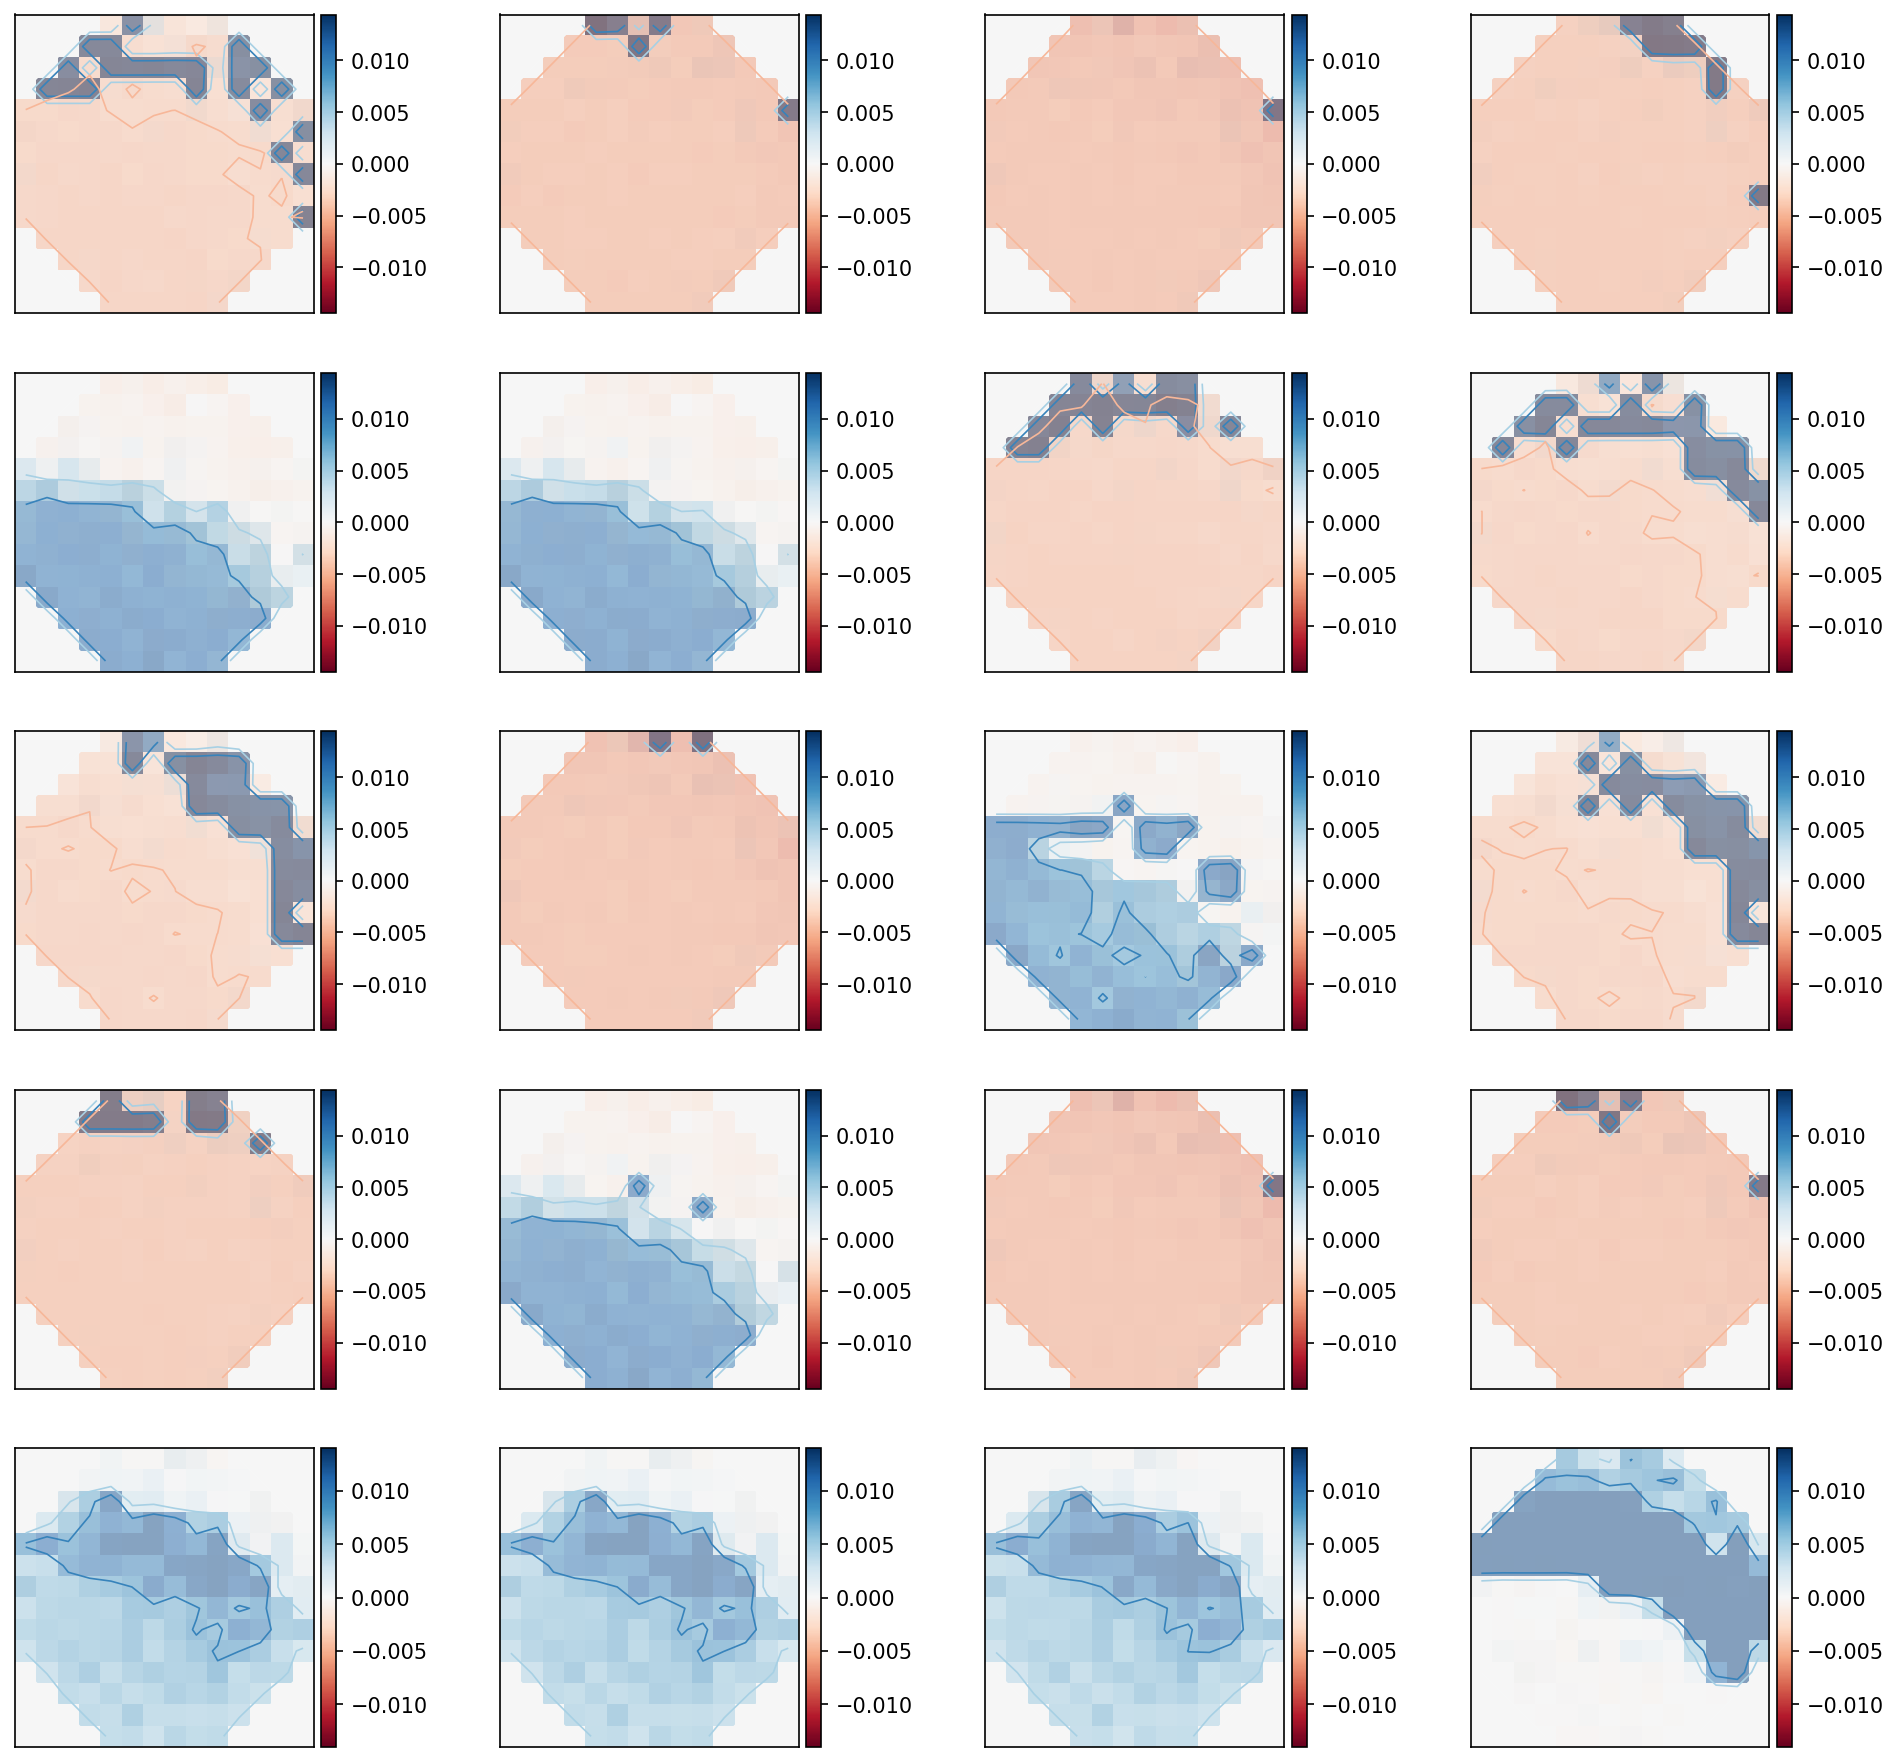

In [187]:
plot_cluster_rfs(0,99,1.0,2.5,0.25,0)

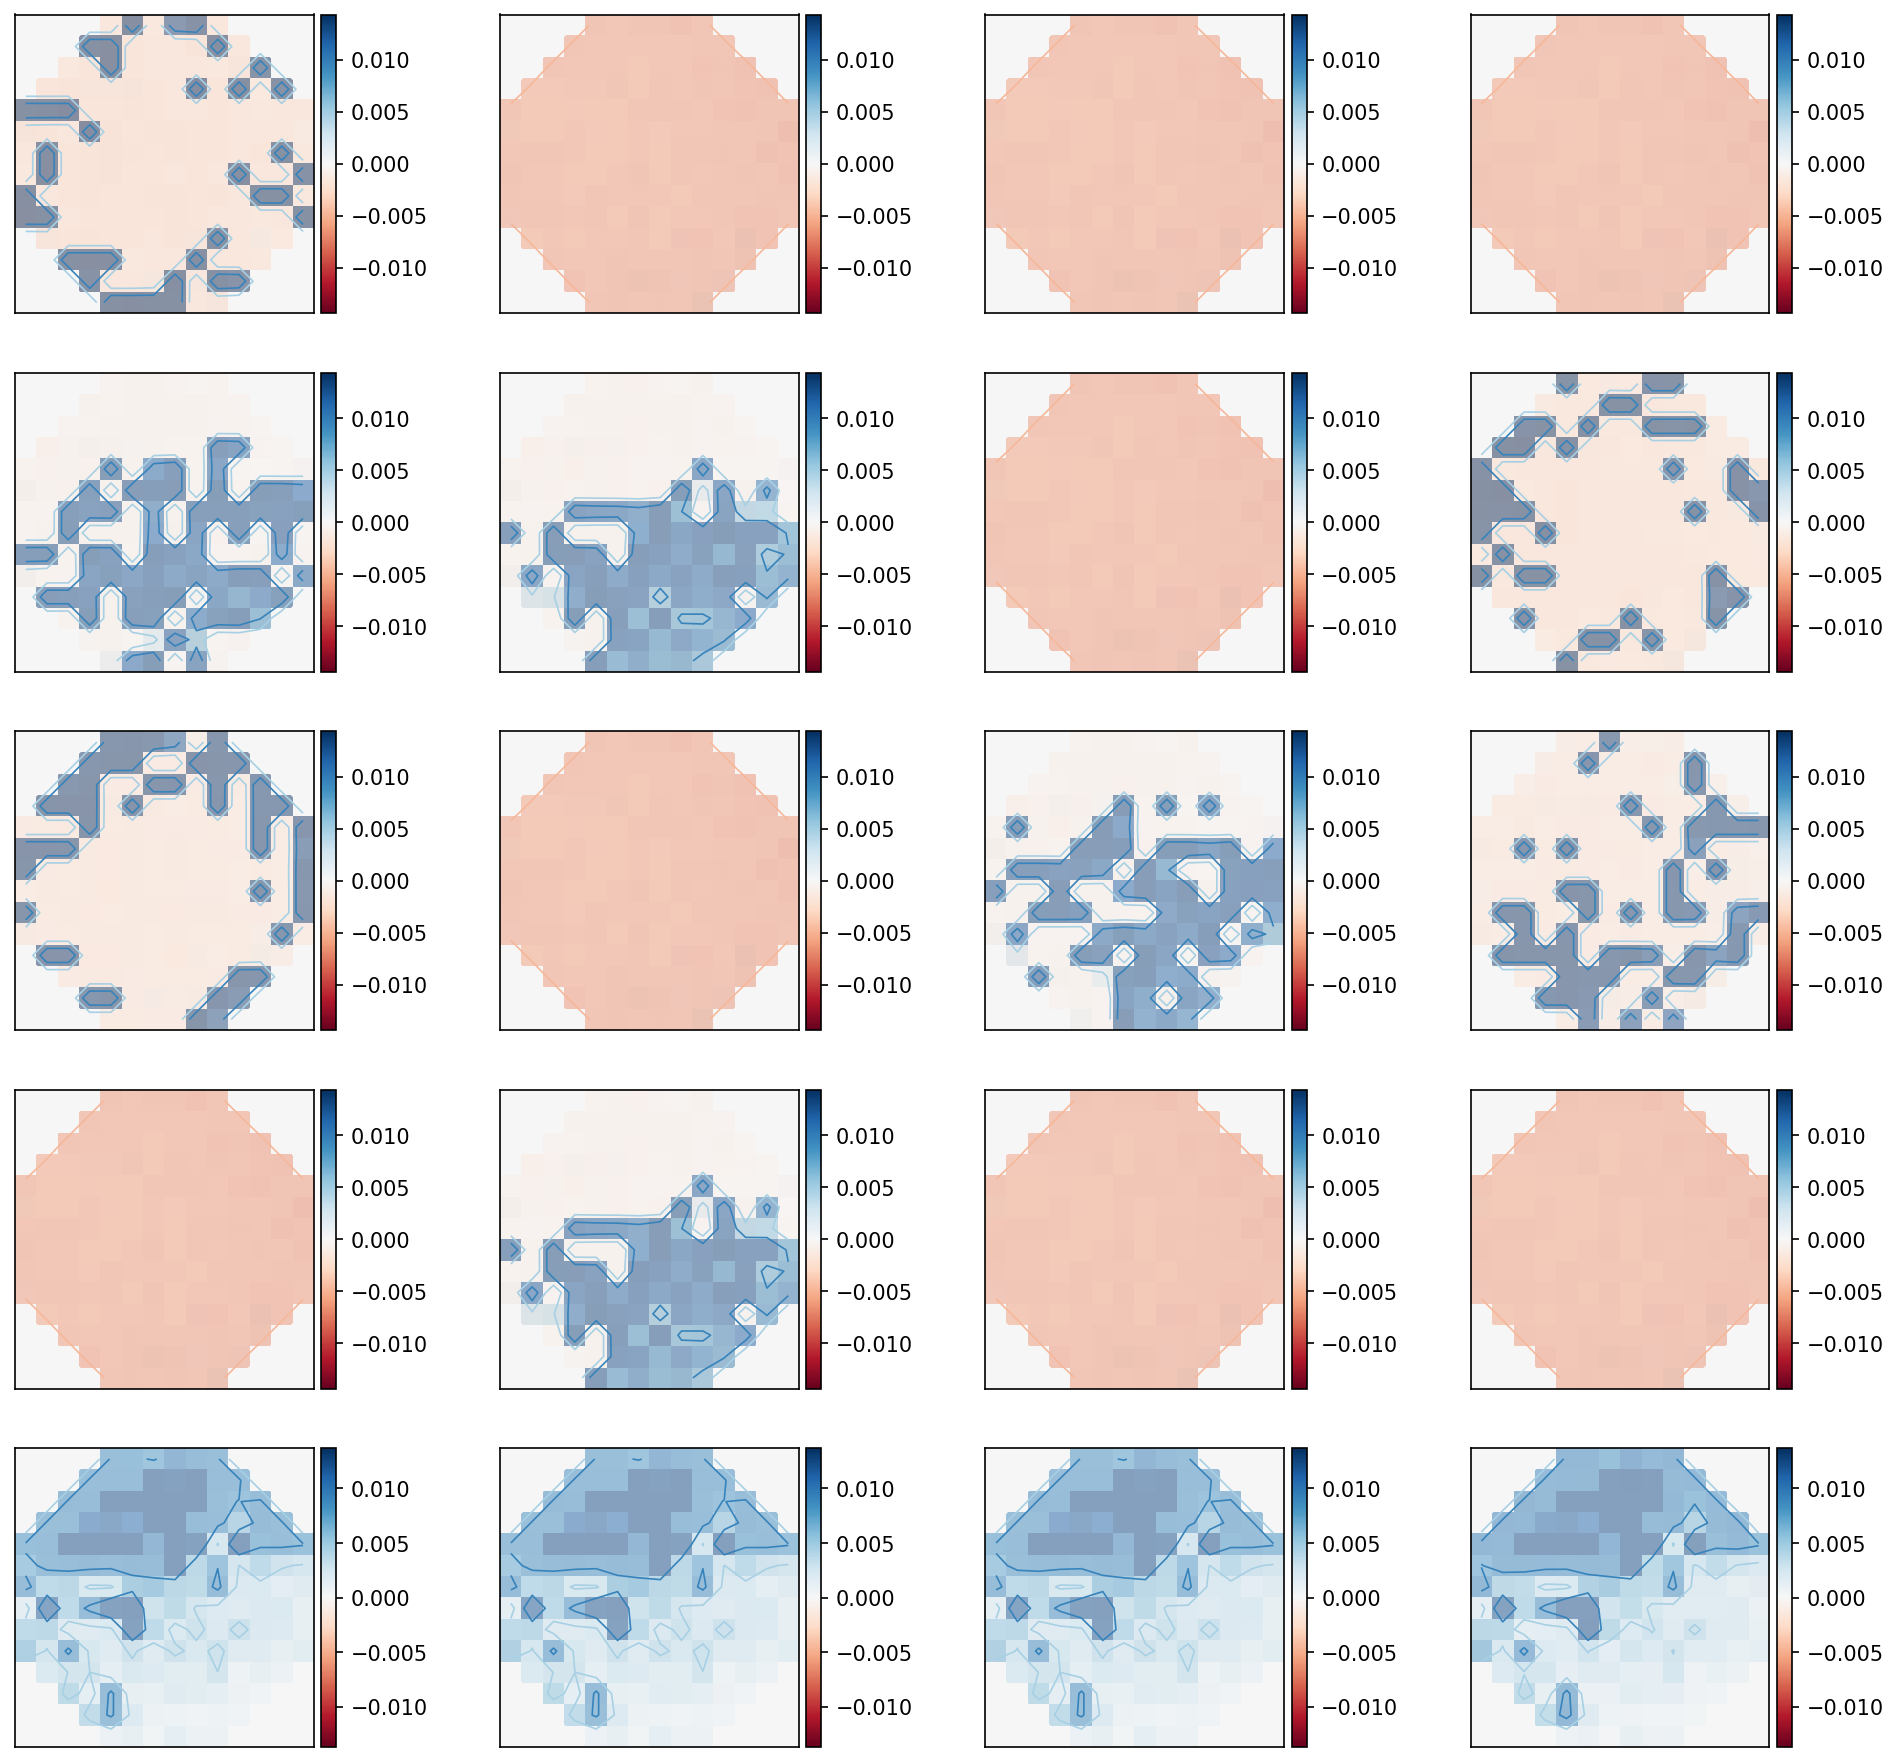

In [199]:
plot_cluster_rfs(0,49,1.0,2.5,0.25,1)

In [ ]:
plot_cluster_rfs(0,100,1.0,2.0,1.0)

In [ ]:
plot_cluster_rfs(0,50,1.0,5.0,1.0)

# Plot 2D Retinotopic Grid Simulation Results

In [44]:
import kayser_model_2d

In [80]:
reload(kayser_model_2d)

net = kayser_model_2d.Model()

34.24706488749125 4.897640403536301 4.897640403536301
58 9 9
1.0 0.625 2.5
1.0 0.625 2.5


# Plot Retinotopic Sheet RF Results

In [3]:
ngrid = 30

xs,ys = np.meshgrid(np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid),np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid))
xs,ys = xs.flatten(),ys.flatten()

In [25]:
reload(pf)

def get_laidout_rf(w,ngrid,i,j,r_arb=3):
    dA = 2*r_arb+1
    this_w = w.reshape(ngrid,ngrid,ngrid,ngrid)[i,j,:,:]
    return np.roll(this_w,(r_arb-i,r_arb-j),axis=(-2,-1))[:dA,:dA]

def layout_2d_rfs(w,ngrid,r_arb=3):
    skip = 0
    dA = 2*r_arb+1
    n_show = ngrid//(1+skip)
    w_2d = np.zeros((n_show*(dA+1)+1,n_show*(dA+1)+1))
    for i in range(n_show):
        for j in range(n_show):
            this_w = w.reshape(ngrid,ngrid,ngrid,ngrid)[i*(1+skip),j*(1+skip),:,:]
            w_2d[1+i*(dA+1):1+i*(dA+1)+dA,1+j*(dA+1):1+j*(dA+1)+dA] =\
                np.roll(this_w,(r_arb-i*(1+skip),r_arb-j*(1+skip)),axis=(-2,-1))[:dA,:dA]
    return w_2d

def get_rfs(seed,n_iter):
    with open('./../results/sim_2d_lgn_wave_rfs_ne=1_ni=1/' +\
        'seed={:d}_iter={:d}.pkl'.format(seed,n_iter), 'rb') as handle:
        res_dict = pickle.load(handle)
    
    wen = res_dict['wex'][:,:ngrid**2]
    wef = res_dict['wex'][:,ngrid**2:]
    
    return wen - wef

def plot_2d_rfs(seed,n_iter,r_arb=3):
    fig,axs = plt.subplots(2, 1, figsize=(6,10), dpi=150)
    
    if n_iter >= 0:
        with open('./../results/sim_2d_lgn_wave_rfs_ne=1_ni=1/' +\
            'seed={:d}_iter={:d}.pkl'.format(seed,n_iter), 'rb') as handle:
            res_dict = pickle.load(handle)
        
        wen = res_dict['wex'][:,:ngrid**2]
        wef = res_dict['wex'][:,ngrid**2:]
        win = res_dict['wix'][:,:ngrid**2]
        wif = res_dict['wix'][:,ngrid**2:]
    else:
        rng = np.random.default_rng(seed)
        wex = rng.uniform(0.4,0.6,size=(16,2*ngrid**2))
        wix = rng.uniform(0.4,0.6,size=(4,2*ngrid**2))
        
        wex *= 1.0 / np.sum(wex,axis=1,keepdims=True)
        wix *= 1.0 / np.sum(wix,axis=1,keepdims=True)
        
        wen = wex[:,:ngrid**2]
        wef = wex[:,ngrid**2:]
        win = wix[:,:ngrid**2]
        wif = wix[:,ngrid**2:]
        
    max_we = np.max(np.concatenate([wen.flatten(),wef.flatten()]))#2*np.mean(np.concatenate([wen.flatten(),wef.flatten()]))
    max_wi = np.max(np.concatenate([win.flatten(),wif.flatten()]))#2*np.mean(np.concatenate([win.flatten(),wif.flatten()]))
    
    wen = layout_2d_rfs(wen,ngrid,r_arb)
    wef = layout_2d_rfs(wef,ngrid,r_arb)
    win = layout_2d_rfs(win,ngrid,r_arb)
    wif = layout_2d_rfs(wif,ngrid,r_arb)
    
    pf.doubimshbar(fig,axs[0],wen,-wef,cmap_name='RdBu',
        vmin=-max_we,vmax=max_we,origin='lower')
    pf.doubcont(fig,axs[0],wen,-wef,cmap='RdBu',
        levels=np.linspace(-max_we,max_we,11),linewidths=0.6,origin='lower')
        # levels=np.linspace(-max_we,max_we,13),linewidths=0.6,origin='lower')
    
    pf.doubimshbar(fig,axs[1],win,-wif,cmap_name='RdBu',
        vmin=-max_wi,vmax=max_wi,origin='lower')
    pf.doubcont(fig,axs[1],win,-wif,cmap='RdBu',
        levels=np.linspace(-max_wi,max_wi,11),linewidths=0.6,origin='lower')
    # levels=np.linspace(-max_wi,max_wi,13),linewidths=0.6,origin='lower')
    
    axs[0].set_title('Excitatory Receptive Fields')
    axs[1].set_title('Inhibitory Receptive Fields')

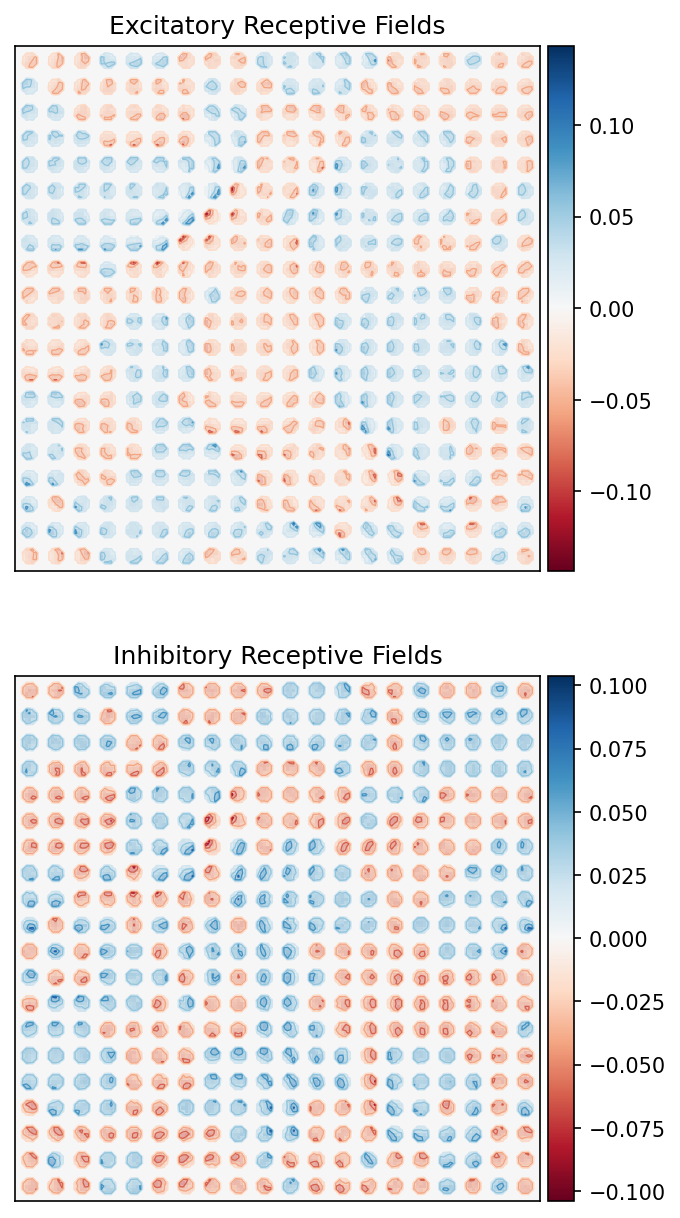

In [257]:
plot_2d_rfs(0,49)

0.008373740659804185


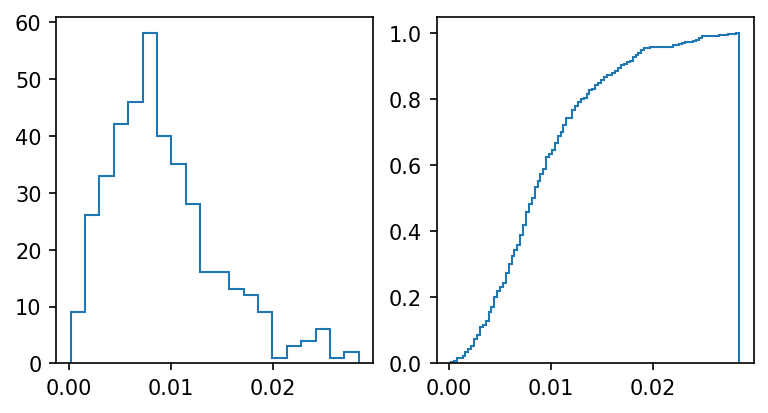

In [233]:
reload(af)

OPM = af.calc_OPM(af.get_rf_fft_resps(
    get_rfs(0,49).reshape(ngrid,ngrid,ngrid,ngrid),ngrid,8))

OS = np.abs(OPM.flatten())

print(np.median(OS))

fig,axs = plt.subplots(1, 2, figsize=(6,3), dpi=150)

axs[0].hist(OS,bins=20,histtype='step')
axs[1].hist(OS,density=True,cumulative=True,bins=100,histtype='step')

plt.show()

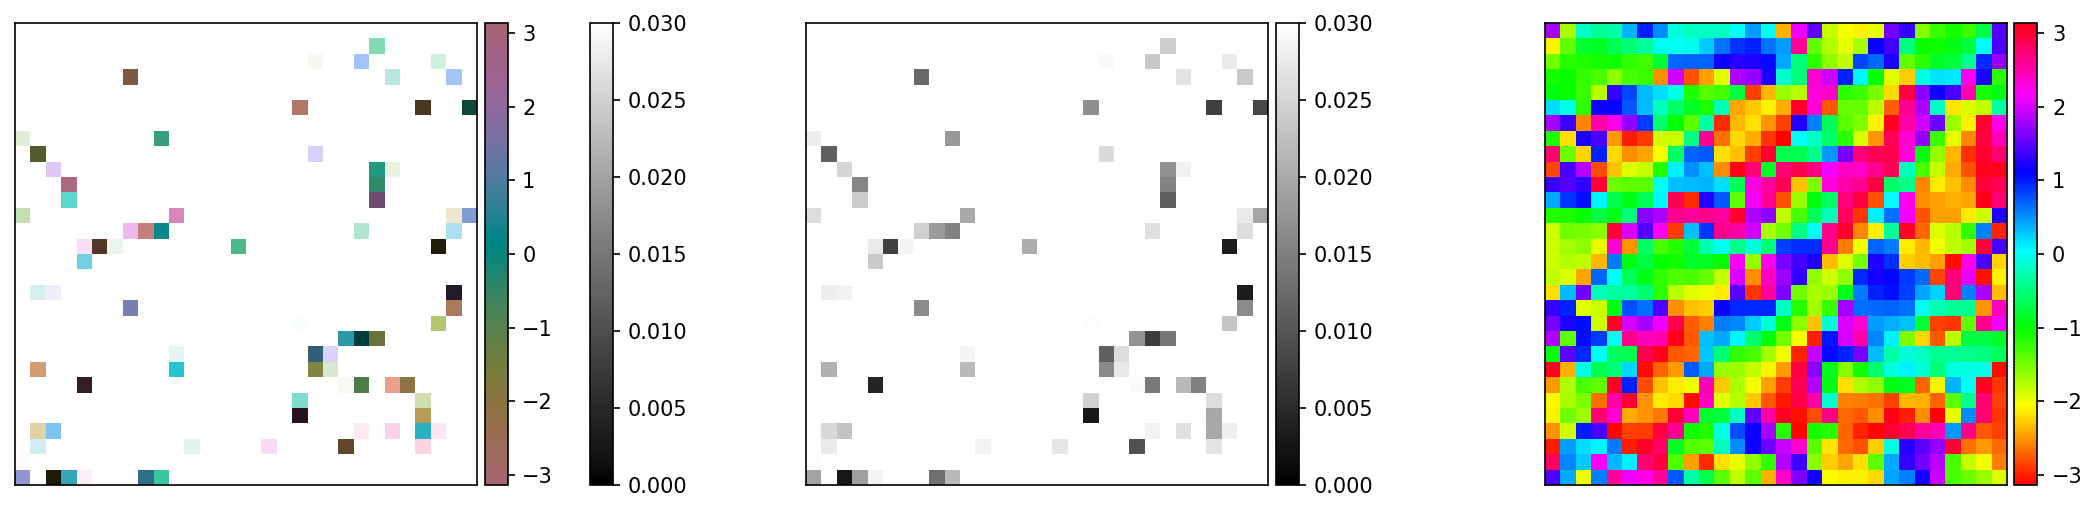

In [679]:
reload(pf)

fig,axs = plt.subplots(1,3,figsize=(18,4),dpi=150)

pf.domcolbar(fig,axs[0],OPM,rlim=(0,0.03))
pf.imshowbar(fig,axs[1],np.abs(OPM),cmap='binary_r',vmin=0,vmax=0.03)
pf.imshowbar(fig,axs[2],np.angle(OPM),cmap=pf.hue_cmap,vmin=-np.pi,vmax=np.pi)

In [103]:
ngrid = 30

xs,ys = np.meshgrid(np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid),np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid))

dxs = xs[:,:,None,None] - xs[None,None,:,:]
dxs[dxs >  0.5] -= 1.0
dxs[dxs < -0.5] += 1.0

dys = ys[:,:,None,None] - ys[None,None,:,:]
dys[dys >  0.5] -= 1.0
dys[dys < -0.5] += 1.0

noris = 6
nphss = 12

freq = 5.1

grates = np.zeros((noris,nphss,ngrid,ngrid,ngrid,ngrid))

for i in range(noris):
    ori = i/noris*np.pi
    # kx,ky = freq*np.cos(ori),freq*np.sin(ori)
    kx,ky = np.round(freq*np.cos(ori)),np.round(freq*np.sin(ori))
    for j in range(nphss):
        phs = j/nphss*2*np.pi+1e-12
        grates[i,j] = 2*(np.heaviside(np.cos(phs+2*np.pi*(kx*dxs+ky*dys)),0.5) - 0.5)
        # grates[i,j] = np.cos(phs+2*np.pi*(kx*dxs+ky*dys))

In [102]:
ngrid = 30

xs,ys = np.meshgrid(np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid),np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid))

noris = 6
nphss = 12

freq = 5.1

sep_grates = np.zeros((noris,nphss,ngrid,ngrid))

for i in range(noris):
    ori = i/noris*np.pi
    # kx,ky = freq*np.cos(ori),freq*np.sin(ori)
    kx,ky = np.round(freq*np.cos(ori)),np.round(freq*np.sin(ori))
    print(kx,ky,np.sqrt(kx**2+ky**2),(ori-np.arctan2(ky,kx))/np.pi)
    for j in range(nphss):
        phs = j/nphss*2*np.pi+1e-12
        # sep_grates[i,j] = 2*(np.heaviside(np.cos(phs+2*np.pi*(kx*xs+ky*ys)),0.5) - 0.5)
        sep_grates[i,j] = 0.5*(1+np.cos(phs+2*np.pi*(kx*xs+ky*ys)))

5.0 0.0 5.0 0.0
4.0 3.0 5.0 -0.0381660980324668
3.0 4.0 5.0 0.03816609803246676
0.0 5.0 5.0 0.0
-3.0 4.0 5.0 -0.0381660980324668
-4.0 3.0 5.0 0.0381660980324668


In [4]:
def get_cluster_rfs(seed,n_iter,s_e,s_i,g_i):
    ngrid = 30
    
    with open('./../results/sim_2d_lgn_wave_rfs_ng=30_ne=1_ni=1_sx=0.07_se={:.2f}_si={:.2f}_gi={:.1f}/'.format(s_e,s_i,g_i) +\
        'seed={:d}_iter={:d}.pkl'.format(seed,n_iter), 'rb') as handle:
        res_dict = pickle.load(handle)
    
    wen = res_dict['wex'][:,:ngrid**2]
    wef = res_dict['wex'][:,ngrid**2:]
    
    return wen - wef

def get_cluster_conn(seed,n_iter,s_e,s_i,g_i):
    ngrid = 30
    
    with open('./../results/sim_2d_lgn_wave_rfs_ng=30_ne=1_ni=1_sx=0.07_se={:.2f}_si={:.2f}_gi={:.1f}/'.format(s_e,s_i,g_i) +\
        'seed={:d}_iter={:d}.pkl'.format(seed,n_iter), 'rb') as handle:
        res_dict = pickle.load(handle)
    
    wen = res_dict['wex'][:,:ngrid**2]
    wef = res_dict['wex'][:,ngrid**2:]
    wee = res_dict['wee']
    
    return wen,wef,wee

def plot_cluster_2d_rfs(seed,n_iter,s_e,s_i,g_i,r_arb=3):
    ngrid = 30
    
    fig,axs = plt.subplots(2, 1, figsize=(8,12), dpi=150)
    
    if n_iter >= 0:
        with open('./../results/sim_2d_lgn_wave_rfs_ng=30_ne=1_ni=1_sx=0.07_se={:.2f}_si={:.2f}_gi={:.1f}/'.format(s_e,s_i,g_i) +\
            'seed={:d}_iter={:d}.pkl'.format(seed,n_iter), 'rb') as handle:
            res_dict = pickle.load(handle)
        
        wen = res_dict['wex'][:,:ngrid**2]
        wef = res_dict['wex'][:,ngrid**2:]
        win = res_dict['wix'][:,:ngrid**2]
        wif = res_dict['wix'][:,ngrid**2:]
    else:
        rng = np.random.default_rng(seed)
        wex = rng.uniform(0.4,0.6,size=(16,2*ngrid**2))
        wix = rng.uniform(0.4,0.6,size=(4,2*ngrid**2))
        
        wex *= 1.0 / np.sum(wex,axis=1,keepdims=True)
        wix *= 1.0 / np.sum(wix,axis=1,keepdims=True)
        
        wen = wex[:,:ngrid**2]
        wef = wex[:,ngrid**2:]
        win = wix[:,:ngrid**2]
        wif = wix[:,ngrid**2:]
        
    max_we = np.max(np.concatenate([wen.flatten(),wef.flatten()]))#2*np.mean(np.concatenate([wen.flatten(),wef.flatten()]))
    max_wi = np.max(np.concatenate([win.flatten(),wif.flatten()]))#2*np.mean(np.concatenate([win.flatten(),wif.flatten()]))
    
    max_we /= 4
    max_wi /= 2 
    
    wen = layout_2d_rfs(wen,ngrid,r_arb)
    wef = layout_2d_rfs(wef,ngrid,r_arb)
    win = layout_2d_rfs(win,ngrid,r_arb)
    wif = layout_2d_rfs(wif,ngrid,r_arb)
    
    pf.doubimshbar(fig,axs[0],wen,-wef,cmap_name='RdBu',
        vmin=-max_we,vmax=max_we,origin='lower')
    pf.doubcont(fig,axs[0],wen,-wef,cmap='RdBu',
        levels=np.linspace(-max_we,max_we,7),linewidths=0.6,alpha=0.8,origin='lower')
    
    pf.doubimshbar(fig,axs[1],win,-wif,cmap_name='RdBu',
        vmin=-max_wi,vmax=max_wi,origin='lower')
    pf.doubcont(fig,axs[1],win,-wif,cmap='RdBu',
        levels=np.linspace(-max_wi,max_wi,7),linewidths=0.6,alpha=0.8,origin='lower')
    
    axs[0].set_title('Excitatory Receptive Fields')
    axs[1].set_title('Inhibitory Receptive Fields')
    
def plot_cluster_2d_rfs_maps(seed,n_iter,s_e,s_i,g_i,r_arb=3):
    ngrid = 30
    
    fig,axs = plt.subplots(4, 4, figsize=(16,12), dpi=150)
    
    with open('./../results/sim_2d_lgn_wave_rfs_ng=30_ne=1_ni=1_sx=0.07_se={:.2f}_si={:.2f}_gi={:.1f}/'.format(s_e,s_i,g_i) +\
        'seed={:d}_iter={:d}.pkl'.format(seed,n_iter), 'rb') as handle:
        res_dict = pickle.load(handle)
    
    wen = res_dict['wex'][:,:ngrid**2]
    wef = res_dict['wex'][:,ngrid**2:]
    win = res_dict['wix'][:,:ngrid**2]
    wif = res_dict['wix'][:,ngrid**2:]
        
    max_we = np.max(np.concatenate([wen.flatten(),wef.flatten()]))#2*np.mean(np.concatenate([wen.flatten(),wef.flatten()]))
    max_wi = np.max(np.concatenate([win.flatten(),wif.flatten()]))#2*np.mean(np.concatenate([win.flatten(),wif.flatten()]))
    
    max_we /= 2
    max_wi /= 2 
    
    wen_laid = layout_2d_rfs(wen,ngrid,r_arb)
    wef_laid = layout_2d_rfs(wef,ngrid,r_arb)
    win_laid = layout_2d_rfs(win,ngrid,r_arb)
    wif_laid = layout_2d_rfs(wif,ngrid,r_arb)
    
    gs = axs[0,0].get_gridspec()
    for ax in axs[:2,:2].flatten():
        ax.remove()
    axbige = fig.add_subplot(gs[:2,:2])
    
    gs = axs[0,2].get_gridspec()
    for ax in axs[:2,2:].flatten():
        ax.remove()
    axbigi = fig.add_subplot(gs[:2,2:])
    
    pf.doubimshbar(fig,axbige,wen_laid,-wef_laid,cmap_name='RdBu',
        vmin=-max_we,vmax=max_we,origin='lower')
    pf.doubcont(fig,axbige,wen_laid,-wef_laid,cmap='RdBu',
        levels=np.linspace(-max_we,max_we,7),linewidths=0.6,alpha=0.8,origin='lower')
    
    pf.doubimshbar(fig,axbigi,win_laid,-wif_laid,cmap_name='RdBu',
        vmin=-max_wi,vmax=max_wi,origin='lower')
    pf.doubcont(fig,axbigi,win_laid,-wif_laid,cmap='RdBu',
        levels=np.linspace(-max_wi,max_wi,7),linewidths=0.6,alpha=0.8,origin='lower')
    
    axbige.set_title('Excitatory Receptive Fields')
    axbigi.set_title('Inhibitory Receptive Fields')
    
    RFs = (wen-wef).reshape(ngrid,ngrid,ngrid,ngrid)
    resps = np.mean(np.fmax(np.sum(RFs.reshape(1,1,ngrid,ngrid,ngrid,ngrid) * grates,(-2,-1)),0),axis=1)
    opm_e = af.calc_OPM(resps.transpose(1,2,0))
    
    RFs = (win-wif).reshape(ngrid,ngrid,ngrid,ngrid)
    resps = np.mean(np.fmax(np.sum(RFs.reshape(1,1,ngrid,ngrid,ngrid,ngrid) * grates,(-2,-1)),0),axis=1)
    opm_i = af.calc_OPM(resps.transpose(1,2,0))

    os_e = np.abs(opm_e.flatten())
    os_i = np.abs(opm_e.flatten())
    
    max_os_e = np.max(os_e)*1.1
    max_os_i = np.max(os_i)*1.1
    
    pf.domcolbar(fig,axs[2,0],opm_e,rlim=(0,max_os_e))
    pf.imshowbar(fig,axs[2,1],np.angle(opm_e),cmap=pf.hue_cmap,vmin=-np.pi,vmax=np.pi)
    pf.imshowbar(fig,axs[2,2],np.abs(opm_e),cmap='binary_r',vmin=0,vmax=max_os_e)
    pf.domcolbar(fig,axs[3,0],opm_i,rlim=(0,max_os_i))
    pf.imshowbar(fig,axs[3,1],np.angle(opm_i),cmap=pf.hue_cmap,vmin=-np.pi,vmax=np.pi)
    pf.imshowbar(fig,axs[3,2],np.abs(opm_i),cmap='binary_r',vmin=0,vmax=max_os_i)

    axs[2,0].set_title('Excitatory Orientation Map')
    axs[2,1].set_title('Excitatory Orientation Preference')
    axs[2,2].set_title('Excitatory Orientation Selectivity')
    axs[3,0].set_title('Inhibitory Orientation Map')
    axs[3,1].set_title('Inhibitory Orientation Preference')
    axs[3,2].set_title('Inhibitory Orientation Selectivity')

    axs[2,3].hist(os_e,bins=np.linspace(0,max_os_e,51),histtype='step')
    axs[3,3].hist(os_i,bins=np.linspace(0,max_os_i,51),histtype='step')
    
    axs[2,3].set_title('Excitatory Orientation Selectivity')
    axs[3,3].set_title('Inhibitory Orientation Selectivity')

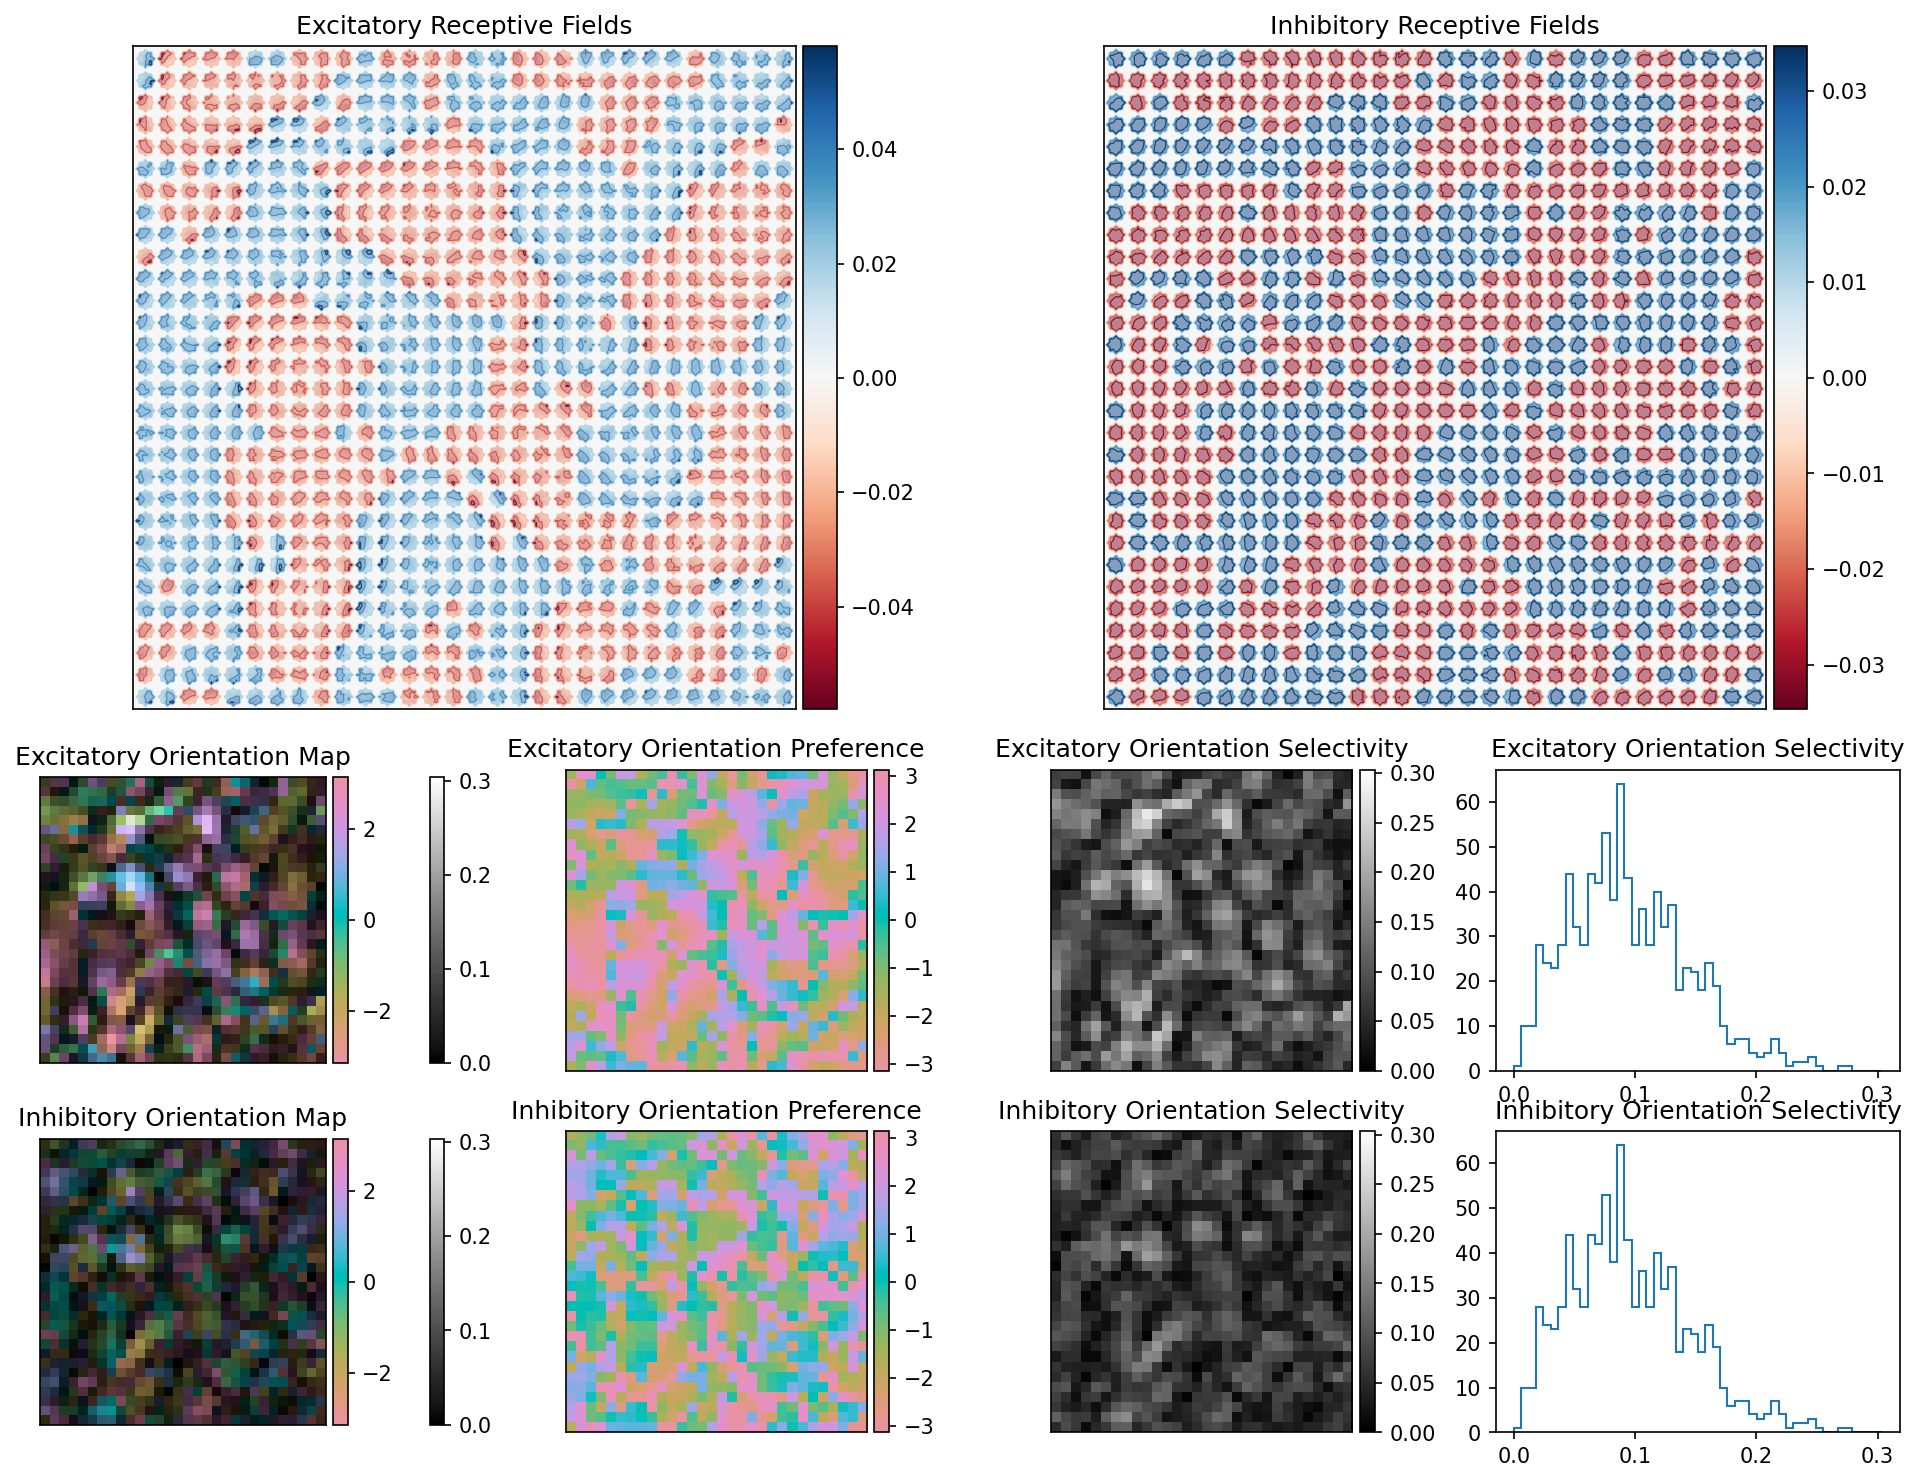

In [104]:
reload(pf)

plot_cluster_2d_rfs_maps(0,49,0.07,0.10,3.0)

In [105]:
wen,wef,wee = get_cluster_conn(0,49,0.07,0.10,3.0)

In [91]:
he = np.einsum('ij,klj->kli',wen,  sep_grates.reshape((6,12,30**2))) +\
     np.einsum('ij,klj->kli',wef,1-sep_grates.reshape((6,12,30**2)))
     
re = np.einsum('ij,klj->kli',np.linalg.inv(np.eye(ngrid**2) - wee),he).reshape(6,12,ngrid,ngrid)

In [92]:
he = he.reshape(6,12,ngrid,ngrid)
he -= np.mean(he,axis=(0,1),keepdims=True)
he = np.fmax(he,0)

re -= np.mean(re,axis=(0,1),keepdims=True)
re = np.fmax(re,0)

In [117]:
h_opm,h_mr = af.calc_OPM_MR(he.transpose(2,3,0,1))
r_opm,r_mr = af.calc_OPM_MR(re.transpose(2,3,0,1))

h_fft = np.abs(np.fft.fftshift(np.fft.fft2(h_opm - np.nanmean(h_opm))))
h_fps = np.zeros(30//2)

r_fft = np.abs(np.fft.fftshift(np.fft.fft2(r_opm - np.nanmean(r_opm))))
r_fps = np.zeros(30//2)

grid = np.arange(-30//2,30//2)
x,y = np.meshgrid(grid,grid)
bin_idxs = np.digitize(np.sqrt(x**2+y**2),np.arange(0,np.ceil(30//2*np.sqrt(2)))+0.5)
for idx in range(30//2):
    h_fps[idx] = np.mean(h_fft[bin_idxs == idx])
    r_fps[idx] = np.mean(r_fft[bin_idxs == idx])

In [147]:
# print(np.unravel_index(np.argsort(np.abs(h_opm),axis=None)[-1],(ngrid,ngrid)))
# print(np.unravel_index(np.argsort(np.abs(h_opm),axis=None)[-2],(ngrid,ngrid)))
# print(np.unravel_index(np.argsort(np.abs(h_opm),axis=None)[0],(ngrid,ngrid)))
# print(np.unravel_index(np.argsort(np.abs(h_opm),axis=None)[1],(ngrid,ngrid)))
max_min_ratio = np.concatenate((wen.reshape(30,30,-1),wef.reshape(30,30,-1)),-1)
max_min_ratio = np.max(max_min_ratio,axis=-1) / np.min(max_min_ratio[max_min_ratio > 1e-8],axis=-1)
print(np.unravel_index(np.argsort(max_min_ratio,axis=None)[-1],(ngrid,ngrid)))
print(np.unravel_index(np.argsort(max_min_ratio,axis=None)[-2],(ngrid,ngrid)))
print(np.unravel_index(np.argsort(max_min_ratio,axis=None)[0],(ngrid,ngrid)))
print(np.unravel_index(np.argsort(max_min_ratio,axis=None)[1],(ngrid,ngrid)))

(np.int64(7), np.int64(8))
(np.int64(24), np.int64(9))
(np.int64(7), np.int64(28))
(np.int64(15), np.int64(7))


In [146]:
np.max(max_min_ratio)

np.float64(335794.39299243846)

In [149]:
thresh_wen,thresh_wef = np.zeros_like(wen),np.zeros_like(wef)
np.copyto(thresh_wen,1,where=wen > 0)
np.copyto(thresh_wef,1,where=wef > 0)

from skimage.measure import regionprops

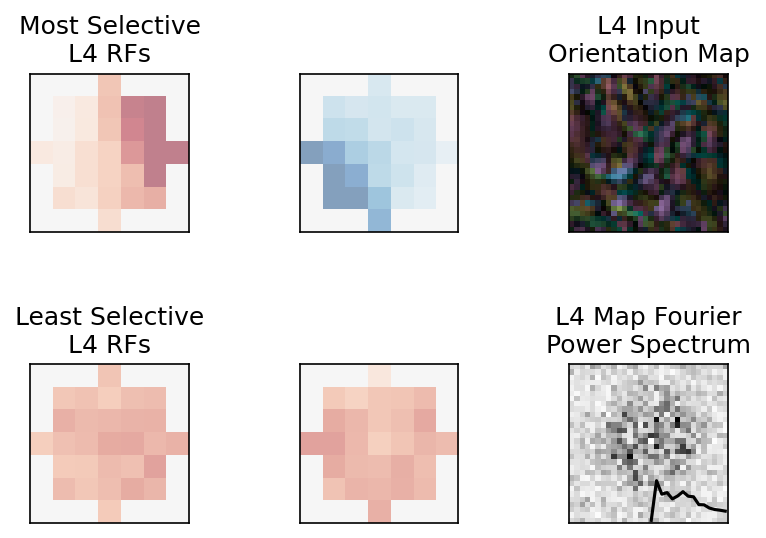

In [178]:
nbins = 100

fig,axs = plt.subplots(2,3,figsize=(6,4),dpi=150)
fig.subplots_adjust(wspace=0.7,hspace=0.7)

for idx in range(2):
    # data_id = np.unravel_index(np.argsort(np.abs(h_opm),axis=None)[-(idx+1)],(ngrid,ngrid))
    data_id = np.unravel_index(np.argsort(max_min_ratio,axis=None)[-(idx+2)],(ngrid,ngrid))
    # data_id = (data_id[1],data_id[0])
    this_on = get_laidout_rf(wen,ngrid,*data_id)**2.5
    this_of = get_laidout_rf(wef,ngrid,*data_id)**2.5
    pf.doubimsh(fig,axs[0,idx],this_on,-this_of,
                cmap_name='RdBu',origin='lower',vmin=-0.0004,vmax=0.0004)
    # if np.sum((this_on > 0).astype(int)) > np.sum((this_of > 0).astype(int)):
    #     props = regionprops((this_on > 0).astype(int))[0]
    # else:
    #     props = regionprops((this_of > 0).astype(int))[0]
    # crc = props['axis_minor_length']/props['axis_major_length']
    # axs[0,idx].text(3,-1,'Circ = {:.2f}'.format(crc),ha='center',va='top',fontsize=14)

axs[0,0].set_title('Most Selective\nL4 RFs')

for idx in range(2):
    # data_id = np.unravel_index(np.argsort(np.abs(h_opm),axis=None)[idx],(ngrid,ngrid))
    data_id = np.unravel_index(np.argsort(max_min_ratio,axis=None)[idx],(ngrid,ngrid))
    # data_id = (data_id[1],data_id[0])
    this_on = get_laidout_rf(wen,ngrid,*data_id)**2.5
    this_of = get_laidout_rf(wef,ngrid,*data_id)**2.5
    pf.doubimsh(fig,axs[1,idx],this_on,-this_of,
                cmap_name='RdBu',origin='lower',vmin=-0.0004,vmax=0.0004)
    # if np.sum((this_on > 0).astype(int)) > np.sum((this_of > 0).astype(int)):
    #     props = regionprops((this_on > 0).astype(int))[0]
    # else:
    #     props = regionprops((this_of > 0).astype(int))[0]
    # crc = props['axis_minor_length']/props['axis_major_length']
    # crc = props['axis_minor_length']/props['axis_major_length']
    # axs[1,idx].text(3,-1,'Circ = {:.2f}'.format(crc),ha='center',va='top',fontsize=14)

axs[1,0].set_title('Least Selective\nL4 RFs')

pf.domcol(fig,axs[0,2],h_opm,rlim=(0,0.5),origin='lower')

axs[0,2].set_title('L4 Input\nOrientation Map')

axs[1,2].imshow(h_fft,origin='lower',cmap='binary')
axs[1,2].plot(30//2+np.arange(30//2),h_fps/np.max(h_fps)*30/4,'k')
axs[1,2].tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

axs[1,2].set_title('L4 Map Fourier\nPower Spectrum')

fig.savefig('./../plots/CosyneFigure_4_a.pdf',dpi=300)
fig.savefig('./../plots/CosyneFigure_4.png',dpi=300)

In [642]:
RFs = get_cluster_rfs(0,49,0.07,0.10,3.0).reshape(ngrid,ngrid,ngrid,ngrid)
resps = np.mean(np.fmax(np.sum(RFs.reshape(1,1,ngrid,ngrid,ngrid,ngrid) * grates,(-2,-1)),0),axis=1)
opm = af.calc_OPM(resps.transpose(1,2,0))
# opm = af.calc_OPM(af.get_rf_fft_resps(RFs,ngrid,8))

(array([0.02333333, 0.07888889, 0.17555556, 0.27777778, 0.39      ,
        0.50777778, 0.60666667, 0.69777778, 0.79      , 0.85555556,
        0.90555556, 0.93888889, 0.96333333, 0.97666667, 0.98333333,
        0.99222222, 0.99666667, 0.99888889, 0.99888889, 1.        ]),
 array([0.00232411, 0.01792134, 0.03351858, 0.04911582, 0.06471305,
        0.08031029, 0.09590753, 0.11150476, 0.127102  , 0.14269923,
        0.15829647, 0.17389371, 0.18949094, 0.20508818, 0.22068541,
        0.23628265, 0.25187989, 0.26747712, 0.28307436, 0.2986716 ,
        0.31426883]),
 <BarContainer object of 20 artists>)

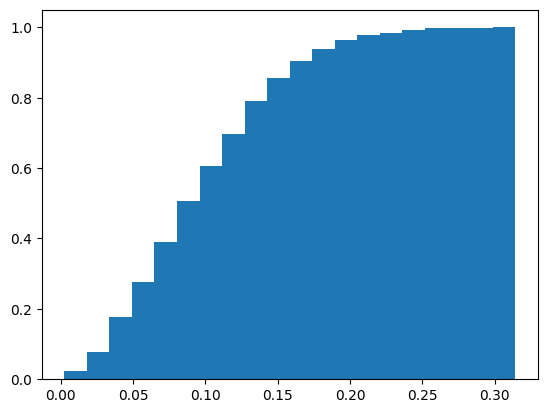

In [76]:
plt.hist(np.abs(opm.flatten()),bins=20,density=True,cumulative=True)

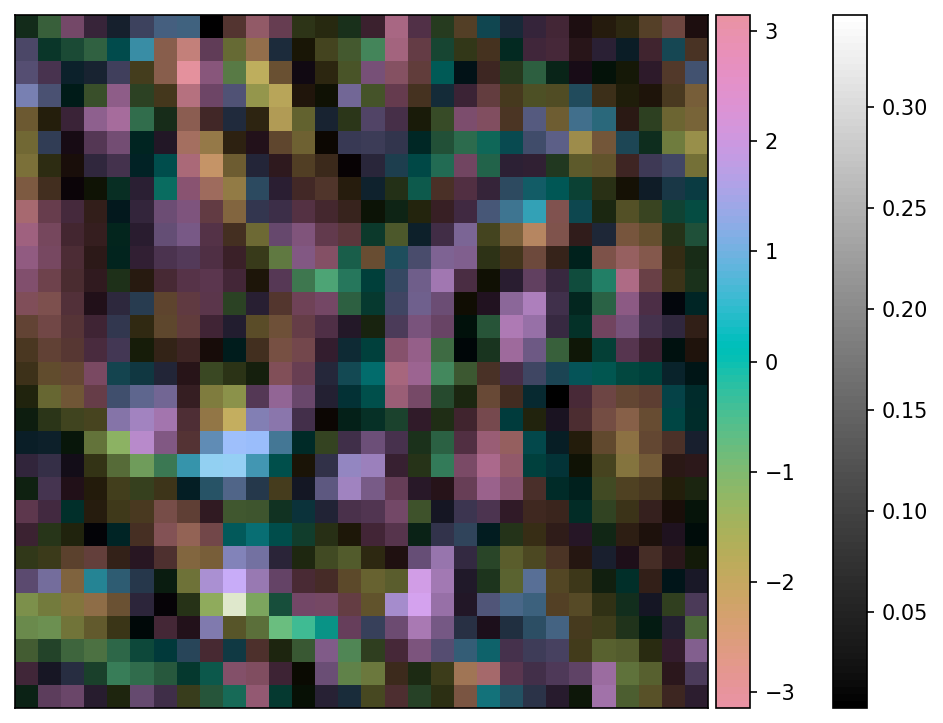

In [77]:
fig,ax = plt.subplots(1,1,figsize=(8,6),dpi=150)

pf.domcolbar(fig,ax,opm,origin='lower')

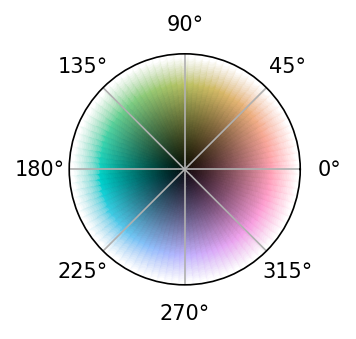

In [3]:
fig,ax = plt.subplots(1,1,figsize=(2,2),dpi=150,subplot_kw={'projection': 'polar'})

n = 50
oris = np.linspace(0,2*np.pi,2*n)
rs = np.linspace(0,1,n+1,endpoint=True)[1:]

colors = pf.hpluv_to_rgb_vec((oris[:,None]/(2*np.pi)*np.ones(n)[None,:]).flatten(),
                             np.ones((2*n,n)).flatten(),
                             (rs[None,:]*np.ones(2*n)[:,None]).flatten()).reshape(2*n,n,3)

for ori_idx,ori in enumerate(oris):
    for r_idx,r in enumerate(rs):
        ax.scatter([ori],[r],c=[colors[ori_idx,r_idx]],s=15*r**2)
        
ax.set_yticks([])
ax.set_ylim(0,1)
        
fig.savefig('./../plots/2d_opm_colorwheel.pdf',dpi=150)

(array([50., 43., 49., 32., 18., 16., 21., 30., 53., 58.]),
 array([-3.13062854, -2.50636094, -1.88209334, -1.25782574, -0.63355814,
        -0.00929054,  0.61497706,  1.23924466,  1.86351226,  2.48777986,
         3.11204746]),
 <BarContainer object of 10 artists>)

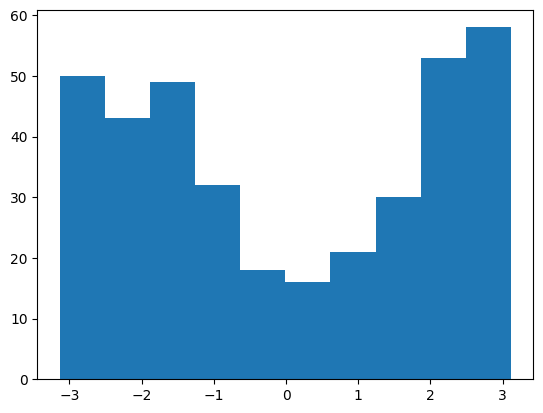

In [645]:
plt.hist(np.angle(opm[np.abs(opm) > 0.1]))

In [144]:
def get_cluster_resps(s_e,s_i,g_i):
    ngrid = 30
    
    with open('./../results/sim_2d_l4_resp_ng=30_ne=1_ni=1_sx=0.07_se={:.2f}_si={:.2f}_gi={:.1f}/'.format(s_e,s_i,g_i) +\
        'grate_evoked_resp.pkl', 'rb') as handle:
        res_dict = pickle.load(handle)
    
    return res_dict

def plot_cluster_2d_resp_maps(s_e,s_i,g_i,m_idx=-1):
    ngrid = 30
    
    # fig,axs = plt.subplots(4, 4, figsize=(16,12), dpi=150)
    fig,axs = plt.subplots(2, 4, figsize=(16,6), dpi=150)
    
    # with open('./../results/sim_2d_l4_resp_ng=30_ne=1_ni=1_sx=0.07_se={:.2f}_si={:.2f}_gi={:.1f}/'.format(s_e,s_i,g_i) +\
    #     'grate_evoked_resp.pkl', 'rb') as handle:
    #     res_dict = pickle.load(handle)
    
    wen,wef,wee = get_cluster_conn(0,49,s_e,s_i,g_i)
    
    # xs,ys = np.meshgrid(np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid),
    #                     np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid))
    # xs,ys = xs.flatten(),ys.flatten()
    # dists = np.sqrt(np.fmin(np.abs(xs[:,None]-xs[None,:]),
    #                         1-np.abs(xs[:,None]-xs[None,:]))**2 +\
    #                 np.fmin(np.abs(ys[:,None]-ys[None,:]),
    #                         1-np.abs(ys[:,None]-ys[None,:]))**2)
    
    # wee[:] = 1
    # np.place(wee,dists <= 1.5*s_e,0)
    # wee *= 0.125 / np.sum(wee,axis=1,keepdims=True)
    
    he = np.einsum('ij,klj->kli',wen,  grates.reshape((6,12,30**2))) +\
         np.einsum('ij,klj->kli',wef,1-grates.reshape((6,12,30**2)))
    
    re = np.einsum('ij,klj->kli',np.linalg.inv(np.eye(ngrid**2) - 7*wee),he)
    
    he -= np.mean(he,axis=(0,1),keepdims=True)
    he = np.fmax(he,0)
    he = he.reshape(6,12,ngrid,ngrid)
    re -= 0.985*np.mean(re)
    re = np.fmax(re,0)
    re = re.reshape(6,12,ngrid,ngrid)
        
    # for idx,keys,label in zip(range(4),[['ff_opm_e','ff_mr_e'],['ff_opm_i','ff_mr_i'],
    #                                     ['opm_e','mr_e'],['opm_i','mr_i']],['Exc Inp','Inh Inp','Exc Rate','Inh Rate']):
    #     if idx >= 2:
    #         opm = res_dict[keys[0]][m_idx,:,:]
    #         mr = res_dict[keys[1]][m_idx,:,:]
    #     else:
    #         opm = res_dict[keys[0]]
    #         mr = res_dict[keys[1]]
    #     max_os = np.max(np.abs(opm))
    #     pf.domcolbar(fig,axs[idx,0],opm,rlim=(0,max_os))
    #     pf.imshowbar(fig,axs[idx,1],np.angle(opm),cmap=pf.hue_cmap,vmin=-np.pi,vmax=np.pi)
    #     pf.imshowbar(fig,axs[idx,2],np.abs(opm),cmap='binary_r',vmin=0,vmax=max_os)
    #     pf.imshowbar(fig,axs[idx,3],mr,cmap='binary_r',vmin=0,vmax=2)

    #     axs[idx,0].set_title(label+' Orientation Map')
    #     axs[idx,1].set_title(label+' Orientation Preference')
    #     axs[idx,2].set_title(label+' Orientation Selectivity'),
    #     axs[idx,3].set_title(label+' Modulation Ratio')
        
    for idx,field,label in zip(range(2),[he,re],['Exc Inp','Exc Rate']):
        opm,mr = af.calc_OPM_MR(field.transpose(2,3,0,1))
        max_os = np.max(np.abs(opm))
        pf.domcolbar(fig,axs[idx,0],opm,rlim=(0,0.5))
        pf.imshowbar(fig,axs[idx,1],np.angle(opm),cmap=pf.hue_cmap,vmin=-np.pi,vmax=np.pi)
        pf.imshowbar(fig,axs[idx,2],np.abs(opm),cmap='binary_r',vmin=0,vmax=0.5)
        pf.imshowbar(fig,axs[idx,3],mr,cmap='binary_r',vmin=0,vmax=2)

        axs[idx,0].set_title(label+' Orientation Map')
        axs[idx,1].set_title(label+' Orientation Preference')
        axs[idx,2].set_title(label+' Orientation Selectivity'),
        axs[idx,3].set_title(label+' Modulation Ratio')
        
    return opm,mr

In [40]:
res_dict = get_cluster_resps(0.07,0.10,3.0)
np.mean(res_dict['resp_e'])

np.float64(0.0)

In [111]:
res_dict['opm_e'].shape

(6, 30, 30)

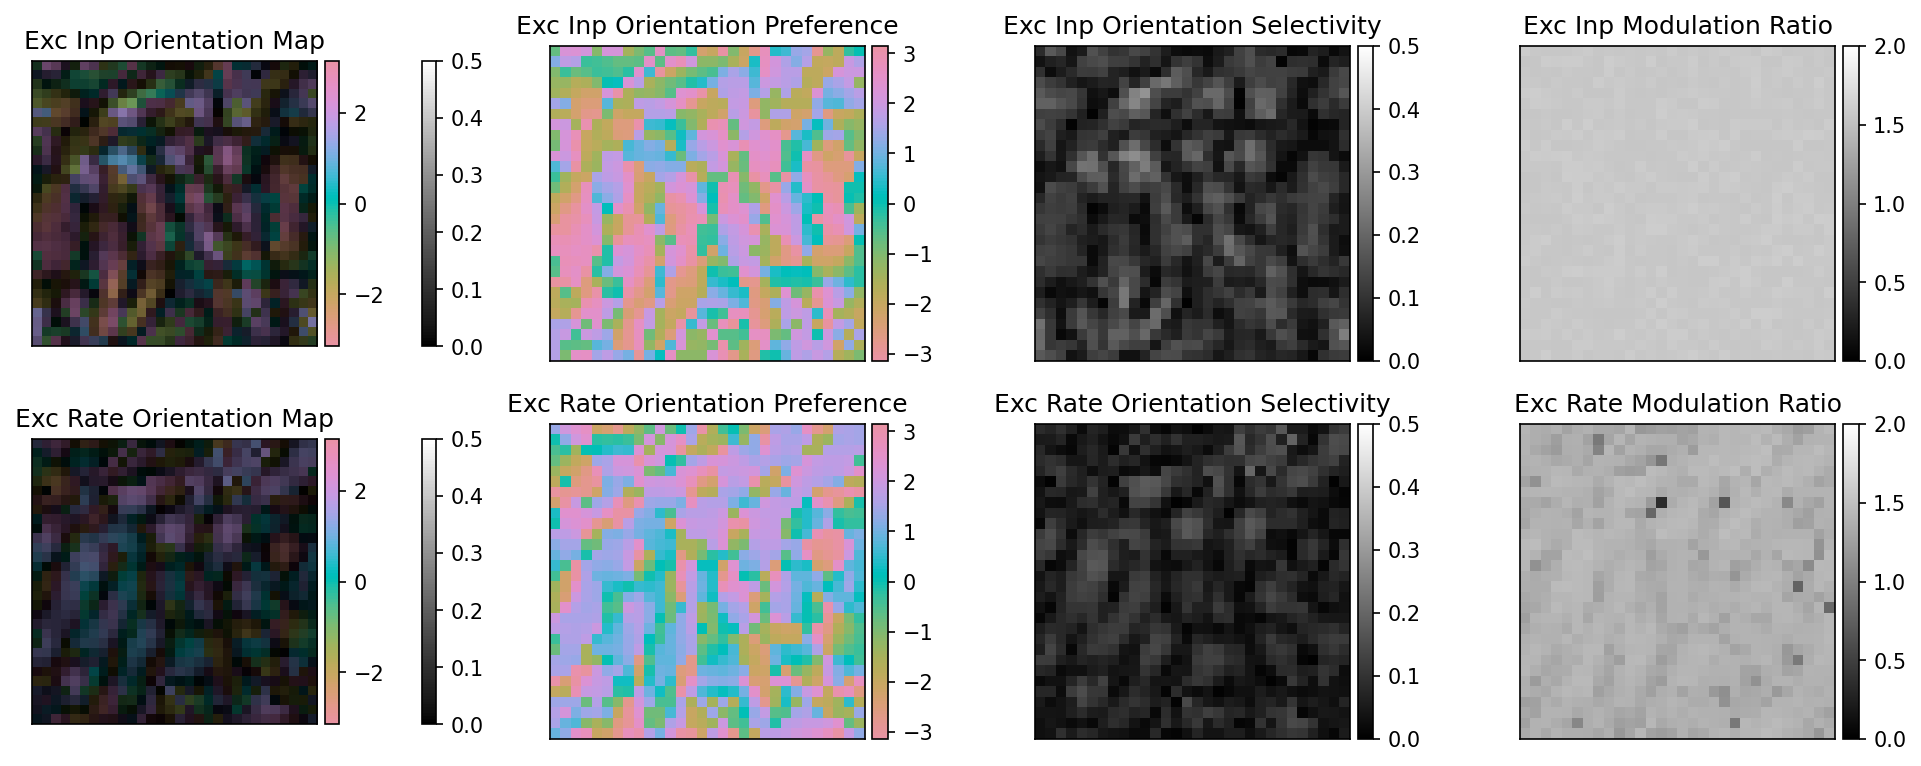

In [145]:
opm,mr = plot_cluster_2d_resp_maps(0.10,0.10,3.0,0)

(array([  1.,   0.,   1.,   1.,   2.,   5.,   9.,  42., 309., 530.]),
 array([0.34803659, 0.46208635, 0.57613611, 0.69018586, 0.80423562,
        0.91828538, 1.03233514, 1.1463849 , 1.26043466, 1.37448441,
        1.48853417]),
 <BarContainer object of 10 artists>)

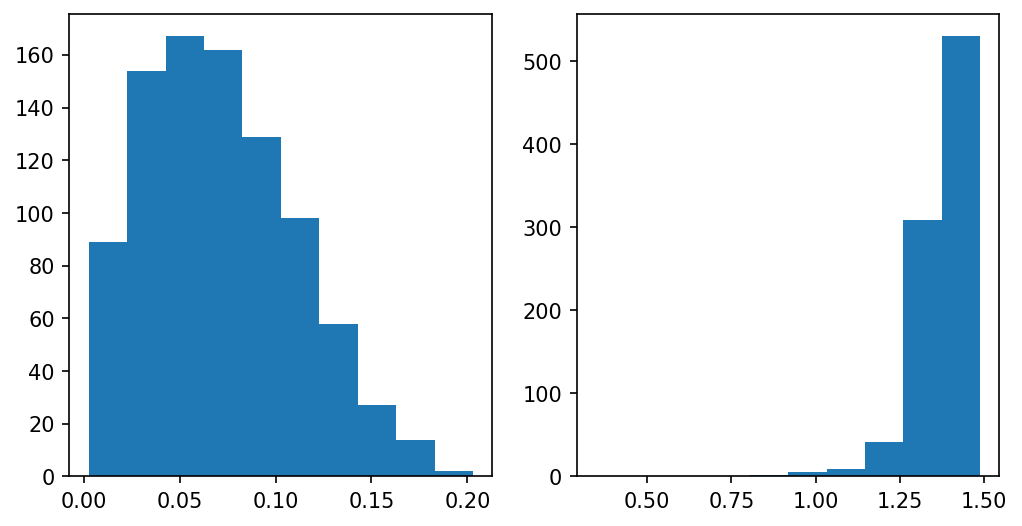

In [146]:
fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=150)

axs[0].hist(np.abs(opm).flatten())
axs[1].hist(mr.flatten())

In [618]:
reload(af)

fft,fps,fps_err = af.get_fps(opm,zero_mean=False,calc_err=True)

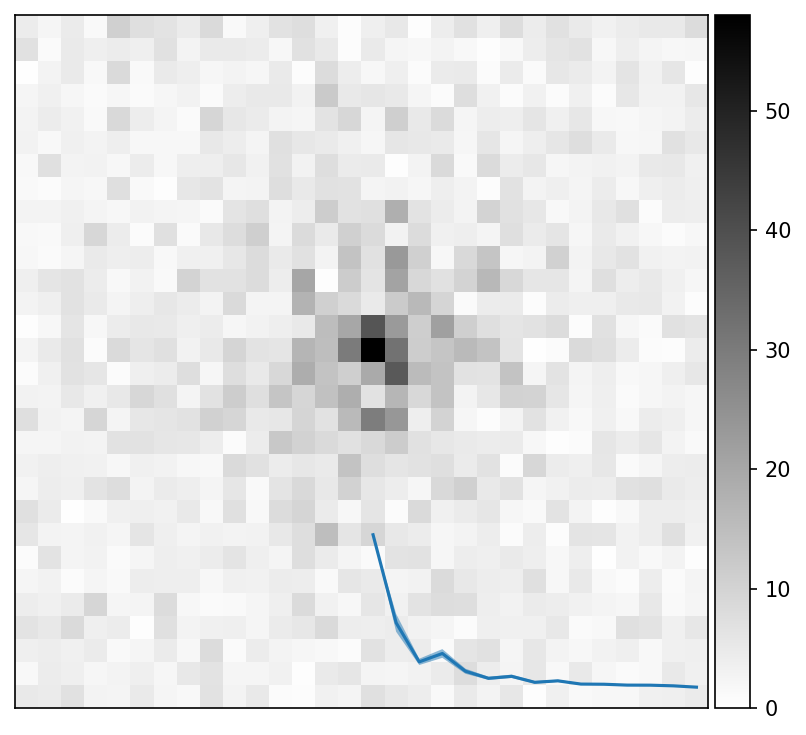

In [619]:
fig,ax = plt.subplots(1,1,figsize=(8,6),dpi=150)

pf.imshowbar(fig,ax,fft,cmap='binary',vmin=0,vmax=np.max(fft),origin='lower')
ax.plot(np.arange(ngrid//2,ngrid),(ngrid//4)*fps[:ngrid//2]/np.nanmax(fps[:ngrid//2-1]))
ax.fill_between(np.arange(ngrid//2,ngrid),(ngrid//4)*(fps[:ngrid//2]+fps_err[:ngrid//2])/np.nanmax(fps[:ngrid//2-1]),
    (ngrid//4)*(fps[:ngrid//2]-fps_err[:ngrid//2])/np.nanmax(fps[:ngrid//2-1]),alpha=0.5)

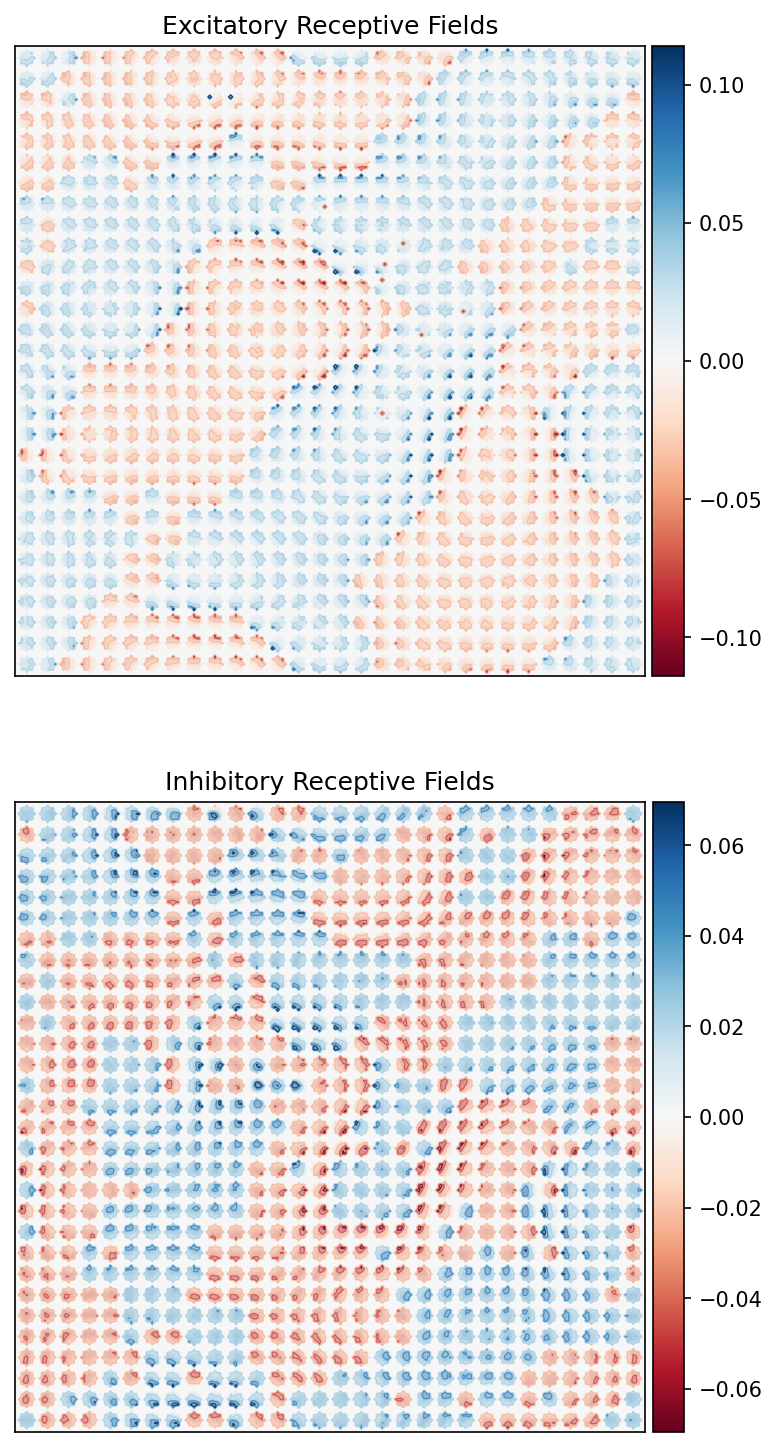

In [422]:
plot_cluster_2d_rfs(0,49,0.07,0.16,3.5)

0.09407799110486728


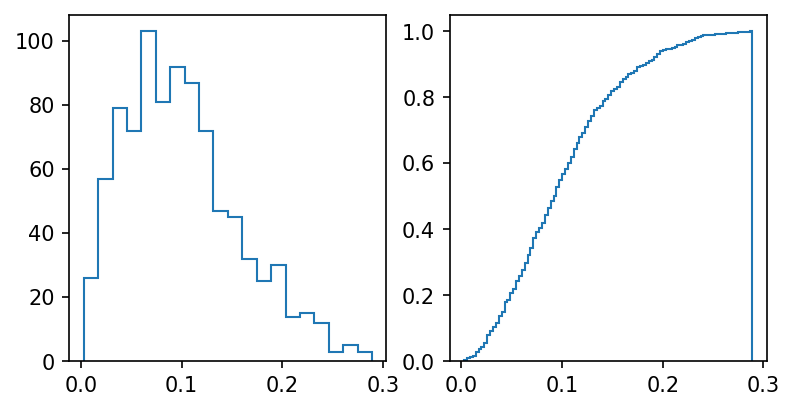

In [392]:
RFs = get_cluster_rfs(0,49,0.07,0.13,3.0)
# max_rf = np.max(np.abs(RFs))
# RFs = (RFs > 0.2*max_rf).astype(int) - (RFs < -0.2*max_rf).astype(int)

resps = np.mean(np.fmax(np.sum(RFs.reshape(1,1,ngrid,ngrid,ngrid,ngrid) * grates,(-2,-1)),0),axis=1)

OPM = af.calc_OPM(resps.transpose(1,2,0))

OS = np.abs(OPM.flatten())

print(np.median(OS))

fig,axs = plt.subplots(1, 2, figsize=(6,3), dpi=150)

axs[0].hist(OS,bins=20,histtype='step')
axs[1].hist(OS,density=True,cumulative=True,bins=100,histtype='step')

plt.show()

0.027421009183258627


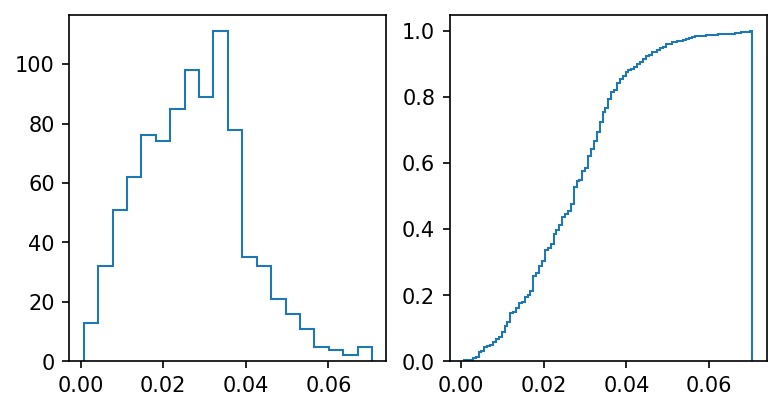

In [333]:
RFs = get_cluster_rfs(0,49,0.07,0.13,3.0)
# max_rf = np.max(np.abs(RFs))
# RFs = (RFs > 0.2*max_rf).astype(int) - (RFs < -0.2*max_rf).astype(int)

OPM = af.calc_OPM(af.get_rf_fft_resps(RFs.reshape(30,30,30,30),30,8))

OS = np.abs(OPM.flatten())

print(np.median(OS))

fig,axs = plt.subplots(1, 2, figsize=(6,3), dpi=150)

axs[0].hist(OS,bins=20,histtype='step')
axs[1].hist(OS,density=True,cumulative=True,bins=100,histtype='step')

plt.show()

0.00639659576618305


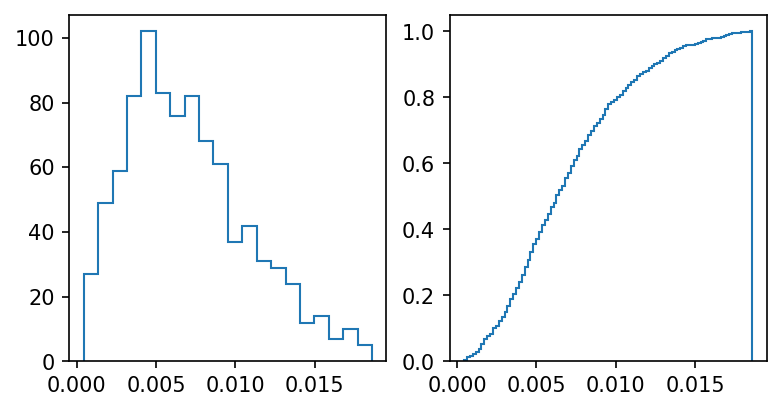

In [325]:
reload(af)

OPM = af.calc_OPM(af.get_rf_fft_resps(
    get_cluster_rfs(0,49,0.07,0.13,3.0).reshape(30,30,30,30),30,8))

OS = np.abs(OPM.flatten())

print(np.median(OS))

fig,axs = plt.subplots(1, 2, figsize=(6,3), dpi=150)

axs[0].hist(OS,bins=20,histtype='step')
axs[1].hist(OS,density=True,cumulative=True,bins=100,histtype='step')

plt.show()

0.0054228623747361515


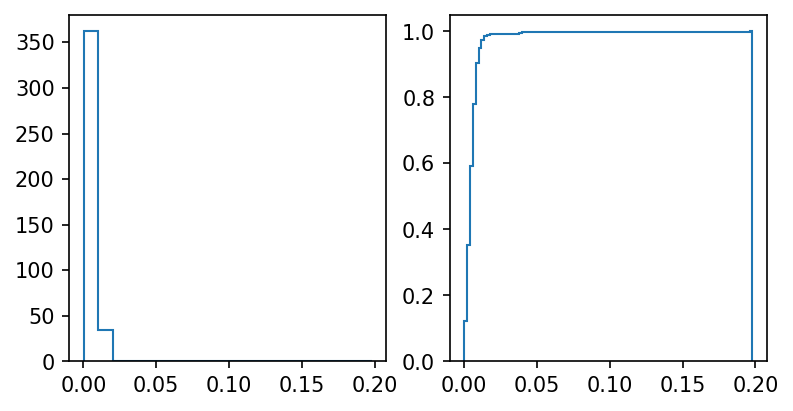

In [219]:
reload(af)

OPM = af.calc_OPM(af.get_rf_fft_resps(
    get_cluster_rfs(0,49,0.08,0.12,2.7,0,1).reshape(ngrid,ngrid,ngrid,ngrid),ngrid,8))

OS = np.abs(OPM.flatten())

print(np.median(OS))

fig,axs = plt.subplots(1, 2, figsize=(6,3), dpi=150)

axs[0].hist(OS,bins=20,histtype='step')
axs[1].hist(OS,density=True,cumulative=True,bins=100,histtype='step')

plt.show()

Text(0.5, 1.0, 'Orientation Preference')

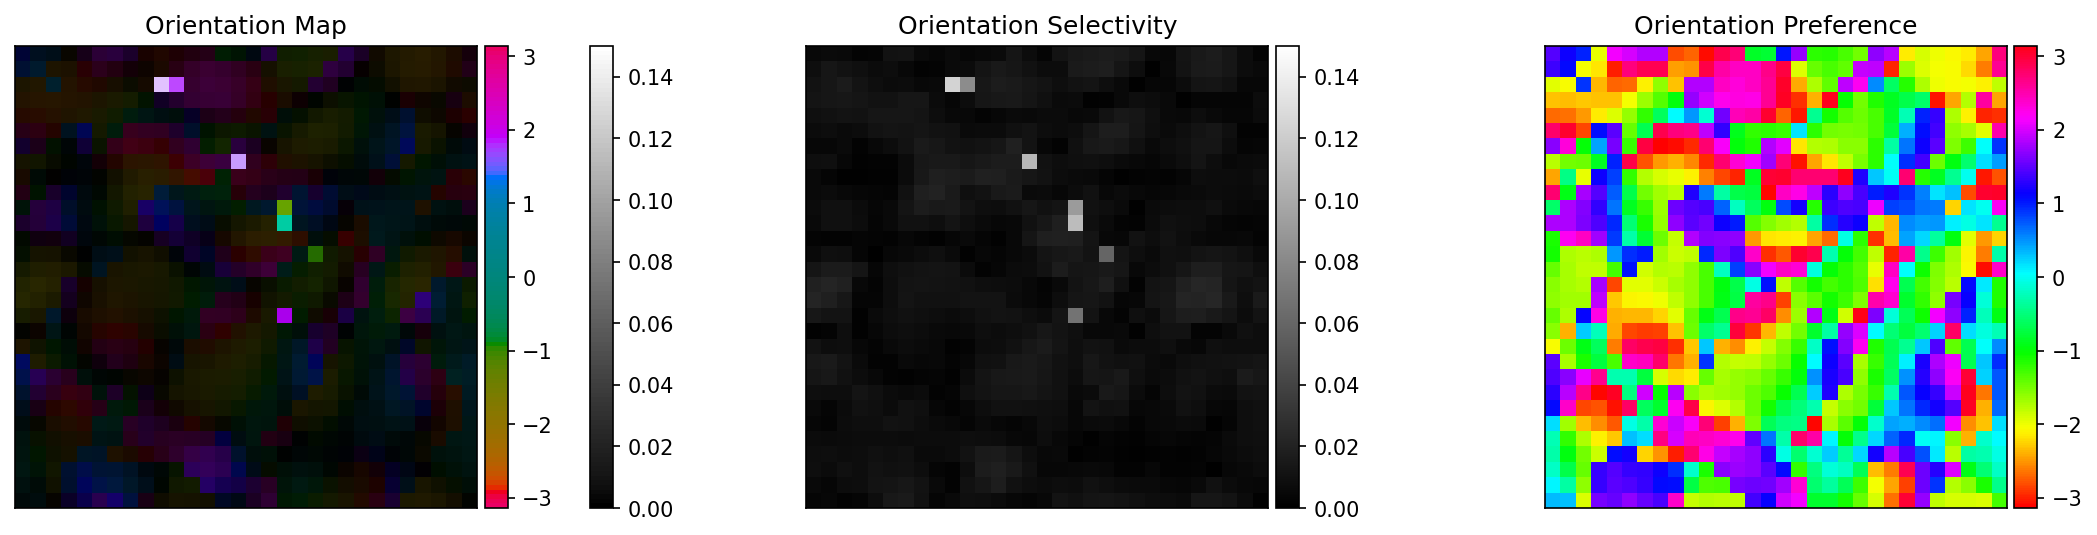

In [275]:
reload(pf)

fig,axs = plt.subplots(1,3,figsize=(18,4),dpi=150)

pf.domcolbar(fig,axs[0],OPM,rlim=(0,0.15))
pf.imshowbar(fig,axs[1],np.abs(OPM),cmap='binary_r',vmin=0,vmax=0.15)
pf.imshowbar(fig,axs[2],np.angle(OPM),cmap=pf.hue_cmap,vmin=-np.pi,vmax=np.pi)

axs[0].set_title('Orientation Map')
axs[1].set_title('Orientation Selectivity')
axs[2].set_title('Orientation Preference')